전체 annotation에서 metal을 포함하는 data만 뽑기

In [1]:
import pandas as pd

# 파일 경로
file_path = '/home/qkrgangeun/LigMet/Nonredund_annotations.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# metals 목록
metals = ["MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"]

# metals을 포함하는 Ligand ID가 있는 PDB ID 찾기
pdb_ids_with_metals = df[df['Ligand ID'].isin(metals)]['PDB ID'].unique()

# 해당 PDB ID를 가지고 있는 데이터만 필터링
filtered_df = df[df['PDB ID'].isin(pdb_ids_with_metals)]

# 필터링된 데이터를 새로운 CSV 파일로 저장
filtered_df.to_csv('/home/qkrgangeun/LigMet/metal_annotations.csv', index=False)


NMR data 제거

In [2]:
import pandas as pd

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'

# 데이터 읽어오기
filtered_df = pd.read_csv(filtered_file_path)

# 'Assembly Detail'이 'NMR'인 데이터 제외
filtered_df_no_nmr = filtered_df[filtered_df['Assembly Detail'] != 'NMR']

# 변경된 데이터를 새로운 파일로 저장
filtered_df_no_nmr.to_csv('/home/qkrgangeun/LigMet/metal_annotations.csv', index=False)

print("Filtered data saved as 'metal_annotations_no_nmr.csv'")


/tmp/ipykernel_51214/2062375908.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv(filtered_file_path)


Filtered data saved as 'metal_annotations_no_nmr.csv'


PDB 개수 : 17418개

In [3]:
import pandas as pd

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'

# 데이터를 읽어오기
filtered_df = pd.read_csv(filtered_file_path)

# unique PDB ID 개수 구하기
unique_pdbid_count = filtered_df['PDB ID'].nunique()

# 결과 출력
print(f"Unique PDB ID count: {unique_pdbid_count}")


Unique PDB ID count: 17418


/tmp/ipykernel_51214/2836226971.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv(filtered_file_path)


10mer 이하의 pdb만 남기기

In [4]:
import pandas as pd
import re

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'
output_file_path = '/home/qkrgangeun/LigMet/metal_annotation_10mer.csv'

# CSV 파일 읽기
df = pd.read_csv(filtered_file_path)

# Stoichiometry에서 n-mer에서 n을 추출하고 10 이하만 필터링
def filter_stoichiometry(stoichiometry):
    match = re.search(r'(\d+)-mer', str(stoichiometry))
    if match:
        n = int(match.group(1))
        return n <= 10  # 10 이하만 남김
    return True  # n-mer 형식이 아니면 그대로 유지

df_filtered = df[df['Stoichiometry'].apply(filter_stoichiometry)]

# 새로운 파일로 저장
df_filtered.to_csv(output_file_path, index=False)

print(f"Filtered file saved to {output_file_path}")


/tmp/ipykernel_51214/3553132695.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filtered_file_path)


Filtered file saved to /home/qkrgangeun/LigMet/metal_annotation_10mer.csv


/tmp/ipykernel_6217/946598484.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filtered_file_path)


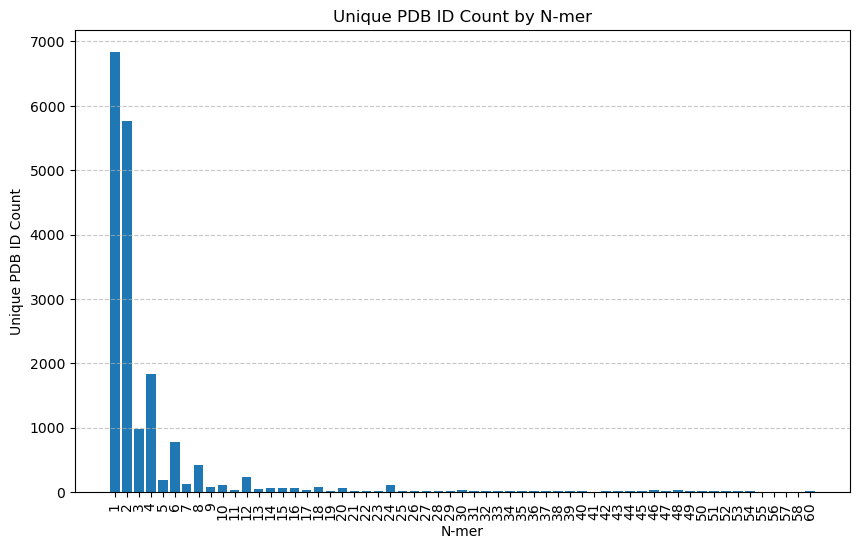

In [30]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotations.csv'

# CSV 파일 읽기
df = pd.read_csv(filtered_file_path)

# Stoichiometry에서 n-mer에서 n을 추출 (homomer 포함)
def extract_n_mer(stoichiometry):
    if isinstance(stoichiometry, str):
        if "monomer" in stoichiometry.lower():
            return 1
        match = re.search(r'(\d+)-mer', stoichiometry)
        if match:
            return int(match.group(1))
    return None

df["n_mer"] = df["Stoichiometry"].apply(extract_n_mer)

# n_mer 값별 unique PDB ID 개수 계산
n_mer_counts = df.groupby("n_mer")["PDB ID"].nunique().sort_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(n_mer_counts.index.astype(str), n_mer_counts.values)
plt.xlabel("N-mer")
plt.ylabel("Unique PDB ID Count")
plt.title("Unique PDB ID Count by N-mer")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


10mer 이하 pdb: 16204개

In [7]:
import pandas as pd

# 파일 경로
filtered_file_path = '/home/qkrgangeun/LigMet/metal_annotation_10mer.csv'

# 데이터를 읽어오기
filtered_df = pd.read_csv(filtered_file_path)

# unique PDB ID 개수 구하기
unique_pdbid_count = filtered_df['PDB ID'].nunique()

# 결과 출력
print(f"Unique PDB ID count: {unique_pdbid_count}")


Unique PDB ID count: 16204


In [14]:
import os
import pandas as pd

# Define directories
ligand_dir = '/home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb'
receptor_dir = '/home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/rec_pdb'
file = '/home/qkrgangeun/LigMet/metal_annotation_10mer.csv'

# Load the CSV with Assembly IDs
df = pd.read_csv(file)

# Create a directory to store merged PDB files
output_dir = '/home/qkrgangeun/LigMet/data/'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the unique PDB IDs
for pdb_id in df['PDB ID'].unique():
    # Get all ligands corresponding to this pdb_id
    ligands = df[df['PDB ID'] == pdb_id]['Ligand Detail'].unique()
    
    # Get all receptors corresponding to this pdb_id
    receptors = df[df['PDB ID'] == pdb_id]['Assembly ID'].unique()
    
    # Create the output file path for merged PDB
    merged_file = os.path.join(output_dir, f"{pdb_id}_merged.pdb")
    
    with open(merged_file, 'w') as merged_f:
        # Write all receptor files
        for receptor in receptors:
            receptor_file = os.path.join(receptor_dir, f"{receptor}.pdb")
            
            # Check if the receptor file exists
            if os.path.exists(receptor_file):
                with open(receptor_file, 'r') as receptor_f:
                    merged_f.write(receptor_f.read())

            else:
                print(f"Missing receptor file: {receptor_file}")
        
        # Write all ligand files
        for ligand in ligands:
            ligand_file = os.path.join(ligand_dir, f"{ligand}.pdb")
            
            # Check if the ligand file exists
            if os.path.exists(ligand_file):
                with open(ligand_file, 'r') as ligand_f:
                    merged_f.write(ligand_f.read())
                # Add a separator between ligands (optional)

            else:
                print(f"Missing ligand file: {ligand_file}")
    
    # print(f"Merged {pdb_id} into {pdb_id}_merged.pdb")


Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1l9h_2_kmer_1_E.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1ob2_1_kmer_1_C.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1p8j_2_kmer_1_R.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1p8j_11_kmer_1_R2.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/1p8j_11_kmer_1_Q1.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2e3x_2_kmer_1_E2.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2z8d_3_kmer_1_C4.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2z8d_3_kmer_1_C3.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/lig_pdb/2z8d_3_kmer_1_D2.pdb
Missing ligand file: /home/khs01654/LigScope/data/raw_data/Q-BioLip/redun/

PDB + biolip metal

In [ ]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)

for pdb in os.listdir(biolip_dir):
    if not pdb.endswith("_merged.pdb"):  # 잘못된 파일 필터링
        continue
    
    pdb_id = pdb.replace("_merged.pdb", "")
    os.chdir(pdb_dir)  # 디렉토리 이동
    
    # PDB 다운로드 명령 실행
    os.system(f"pdb_get {pdb_id}")
    
    biolip_path = biolip_dir / pdb
    pdb_path = pdb_dir / f"{pdb_id}.pdb"
    processed_path = processed_dir / f"{pdb_id}.pdb"
    
    if not pdb_path.exists():  # 다운로드 실패 방지
        print(f"Warning: {pdb_id}.pdb not found in {pdb_dir}")
        continue
    
    with open(biolip_path, 'r') as b, open(pdb_path, 'r') as p, open(processed_path, 'w') as file:
        biolip_text = b.read()
        
        for line in p:
            if line.startswith('ATOM'):
                if line in biolip_text:
                    file.write(line)
            elif line.startswith('HETATM'):
                atom_elem = line[76:78].strip()  # 원소명 위치 수정
                res_name = line[17:20].strip()  # 리간드명 위치 수정
                
                if atom_elem in metals:
                    if line in biolip_text:
                        file.write(line)
                elif res_name != 'HOH':
                    file.write(line)


pdb_get 안되는 PDB: 187

In [1]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)

# Biolip에 있는 PDB ID 추출
biolip_pdb_ids = {p.stem.replace("_merged", "") for p in biolip_dir.glob("*_merged.pdb")}

# PDB 디렉토리에 있는 PDB ID 추출
pdb_pdb_ids = {p.stem for p in pdb_dir.glob("*.pdb")}

# 없는 PDB ID 찾기 및 다운로드
missing_pdb_ids = biolip_pdb_ids - pdb_pdb_ids
print(missing_pdb_ids)
# for pdb_id in missing_pdb_ids:
#     os.chdir(pdb_dir)  # 디렉토리 이동
#     os.system(f"pdb_get {pdb_id}")

{'7u0l', '8sz8', '7b2t', '8ovs', '6z6b', '7pxb', '6gua', '8atj', '7a26', '7ah2', '6p7n', '8tvi', '7qan', '7an1', '7p7w', '7bkx', '7t8n', '7plr', '7aks', '7pzh', '8g32', '7p24', '6yq9', '8bbz', '9ayj', '7ahz', '8ekk', '7zc0', '7r5t', '8pmg', '7oyk', '7t3q', '7b6v', '8pqy', '7dwx', '9avg', '7atk', '8oru', '7md2', '8ci0', '7oz9', '7nzq', '7xi9', '7nb3', '6y9i', '7oza', '8bjp', '7pi1', '7blh', '8f1e', '7od0', '8xvf', '7r1o', '5exc', '7pwi', '6tsp', '8eaq', '8xfr', '8g8p', '6yak', '8igw', '6tt9', '7anb', '7uc3', '7nt0', '7ova', '7bgo', '7ze9', '6wfj', '6tu7', '8jif', '8jpg', '6qsx', '7nyd', '7pmz', '7ne9', '8agd', '5euj', '6ss4', '6zk0', '8acq', '7t3p', '8eey', '7b4o', '8aeh', '4v7n', '7pi4', '8dcm', '6yxm', '6vgs', '6t1a', '7nrr', '7mks', '8atx', '8bd6', '7z6t', '8cb2', '6t2n', '7pl5', '7zgy', '7os3', '8col', '6xxg', '8ap0', '6z3o', '8rty', '8vl7', '7eiz', '8pvs', '7a9g', '6tmm', '7z4o', '4v4d', '7bl1', '6tn1', '7ok6', '7okr', '7zg8', '8b0f', '8wwv', '4wsn', '6to5', '7pq9', '6xi1', '8amt',

wget 해보려고 했으나, not found

In [ ]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)

# Biolip에 있는 PDB ID 추출
biolip_pdb_ids = {p.stem.replace("_merged", "") for p in biolip_dir.glob("*_merged.pdb")}

# PDB 디렉토리에 있는 PDB ID 추출
pdb_pdb_ids = {p.stem for p in pdb_dir.glob("*.pdb")}

# 없는 PDB ID 찾기 및 다운로드
missing_pdb_ids = biolip_pdb_ids - pdb_pdb_ids

os.chdir(pdb_dir)  # 디렉토리 이동
for pdb_id in missing_pdb_ids:
    print(f"wget {pdb_id}.pdb")
    os.system(f"wget https://files.rcsb.org/download/{pdb_id}.pdb")

wget 7u0l.pdb


--2025-02-18 12:56:05--  https://files.rcsb.org/download/7u0l.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.14, 3.168.178.15, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-18 12:56:07 ERROR 404: Not Found.

--2025-02-18 12:56:07--  https://files.rcsb.org/download/8sz8.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.46, 3.168.178.7, 3.168.178.15, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.46|:443... connected.
HTTP request sent, awaiting response... 

wget 8sz8.pdb


404 Not Found
2025-02-18 12:56:09 ERROR 404: Not Found.

--2025-02-18 12:56:09--  https://files.rcsb.org/download/7b2t.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.46, 3.168.178.7, 3.168.178.14, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.46|:443... connected.
HTTP request sent, awaiting response... 

wget 7b2t.pdb


404 Not Found
2025-02-18 12:56:12 ERROR 404: Not Found.

--2025-02-18 12:56:12--  https://files.rcsb.org/download/8ovs.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.14, 3.168.178.46, 3.168.178.15, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.14|:443... connected.
HTTP request sent, awaiting response... 

wget 8ovs.pdb


404 Not Found
2025-02-18 12:56:14 ERROR 404: Not Found.

--2025-02-18 12:56:14--  https://files.rcsb.org/download/6z6b.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.14, 3.168.178.46, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.14|:443... connected.
HTTP request sent, awaiting response... 

wget 6z6b.pdb


404 Not Found
2025-02-18 12:56:16 ERROR 404: Not Found.

--2025-02-18 12:56:16--  https://files.rcsb.org/download/7pxb.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.46, 3.168.178.14, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.46|:443... connected.
HTTP request sent, awaiting response... 

wget 7pxb.pdb


404 Not Found
2025-02-18 12:56:18 ERROR 404: Not Found.

--2025-02-18 12:56:18--  https://files.rcsb.org/download/6gua.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.7, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 6gua.pdb


404 Not Found
2025-02-18 12:56:21 ERROR 404: Not Found.

--2025-02-18 12:56:21--  https://files.rcsb.org/download/8atj.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.14, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 8atj.pdb


404 Not Found
2025-02-18 12:56:23 ERROR 404: Not Found.

--2025-02-18 12:56:23--  https://files.rcsb.org/download/7a26.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.7, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 7a26.pdb


404 Not Found
2025-02-18 12:56:25 ERROR 404: Not Found.

--2025-02-18 12:56:25--  https://files.rcsb.org/download/7ah2.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.46, 3.168.178.14, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 

wget 7ah2.pdb


404 Not Found
2025-02-18 12:56:27 ERROR 404: Not Found.

--2025-02-18 12:56:27--  https://files.rcsb.org/download/6p7n.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.46, 3.168.178.14, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 6p7n.pdb
wget 8tvi.pdb


--2025-02-18 12:56:29--  https://files.rcsb.org/download/8tvi.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.14, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-02-18 12:56:31 ERROR 404: Not Found.

--2025-02-18 12:56:31--  https://files.rcsb.org/download/7qan.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.46, 3.168.178.7, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 7qan.pdb


404 Not Found
2025-02-18 12:56:34 ERROR 404: Not Found.

--2025-02-18 12:56:34--  https://files.rcsb.org/download/7an1.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.14, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 

wget 7an1.pdb


404 Not Found
2025-02-18 12:56:36 ERROR 404: Not Found.

--2025-02-18 12:56:36--  https://files.rcsb.org/download/7p7w.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.15, 3.168.178.14, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.15|:443... connected.
HTTP request sent, awaiting response... 

wget 7p7w.pdb


404 Not Found
2025-02-18 12:56:38 ERROR 404: Not Found.

--2025-02-18 12:56:38--  https://files.rcsb.org/download/7bkx.pdb
Resolving files.rcsb.org (files.rcsb.org)... 3.168.178.7, 3.168.178.14, 3.168.178.46, ...
Connecting to files.rcsb.org (files.rcsb.org)|3.168.178.7|:443... connected.
HTTP request sent, awaiting response... 

wget 7bkx.pdb


Receptor: PDB / 
Metal: Biolip + PDB / 
Ligand: PDB

In [12]:
import os
from pathlib import Path

# 경로 설정
biolip_dir = Path("/home/qkrgangeun/LigMet/data/merge")
pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
processed_dir = Path("/home/qkrgangeun/LigMet/data/processed")
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# 디렉토리 생성
os.makedirs(processed_dir, exist_ok=True)
list = os.makedirs(processed_dir, exist_ok=True)
# for pdb in os.listdir(pdb_dir):
for pdb in list:
    if not pdb.endswith(".pdb"):  # 잘못된 파일 필터링
        continue
    
    pdb_id = pdb.replace(".pdb", "")
    
    biolip_path = biolip_dir / f"{pdb_id}_merged.pdb"
    pdb_path = pdb_dir / f"{pdb_id}.pdb"
    processed_path = processed_dir / f"{pdb_id}.pdb"
    
    if not pdb_path.exists():  # 다운로드 실패 방지
        print(f"Warning: {pdb_id}.pdb not found in {pdb_dir}")
        continue
    
    with open(biolip_path, 'r') as b, open(pdb_path, 'r') as p, open(processed_path, 'w') as file:
        biolip_text = [line[30:81].strip() for line in b if line.startswith(('HETATM','ATOM'))]
        # print(biolip_text)
        for line in p:
            if line.startswith('ATOM'):
                if line[30:81].strip() in biolip_text:
                    file.write(line)
            elif line.startswith('HETATM'):
                atom_elem = line[76:78].strip()  # 원소명 위치 수정
                res_name = line[17:20].strip()  # 리간드명 위치 수정
                
                if atom_elem in metals:
                    if line[30:81].strip() in biolip_text:
                        file.write(line)
                elif res_name != 'HOH':
                    file.write(line)
        print(processed_path)

['87.515  98.365 143.166  1.00 87.46           N', '88.928  98.250 143.502  1.00 87.46           C', '89.176  97.047 144.404  1.00 87.46           C', '89.913  96.129 144.041  1.00 87.46           O', '89.424  99.529 144.180  1.00 87.46           C', '88.555  97.061 145.586  1.00 86.20           N', '88.738  95.964 146.531  1.00 86.20           C', '88.202  94.653 145.968  1.00 86.20           C', '88.828  93.598 146.130  1.00 86.20           O', '88.062  96.297 147.860  1.00 86.20           C', '87.042  94.698 145.307  1.00 86.35           N', '86.481  93.484 144.721  1.00 86.35           C', '87.380  92.934 143.622  1.00 86.35           C', '87.637  91.725 143.565  1.00 86.35           O', '85.078  93.762 144.182  1.00 86.35           C', '87.877  93.808 142.744  1.00 84.46           N', '88.788  93.355 141.699  1.00 84.46           C', '90.051  92.757 142.302  1.00 84.46           C', '90.529  91.710 141.850  1.00 84.46           O', '89.133  94.512 140.763  1.00 84.46           C',

Dataset 통계: Metal-Ligand PDB개수 통계
Metal-Ligand: 6067
Total: 16017

In [16]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
from Bio import PDB
import numpy as np

def check_metal_ligand_interaction(file):
    metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("structure", file)
    
    metal_positions = []
    ligand_positions = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                res_name = residue.get_resname().strip()
                if "H_" in residue.id[0]: 
                    for atom in residue:
                        atom_name = atom.element.strip().upper()
                        coord = atom.get_coord()
                        if atom_name in metals:
                            metal_positions.append(coord)
                        elif res_name != "HOH":
                            ligand_positions.append(coord)
    
    if not metal_positions or not ligand_positions:
        return False
    
    metal_positions = np.array(metal_positions)
    ligand_positions = np.array(ligand_positions)
    
    # 거리 행렬 계산 (모든 금속-리간드 조합 간 거리)
    dists = np.linalg.norm(metal_positions[:, np.newaxis] - ligand_positions, axis=2)
    np.any(dists < 3.0)
    return np.any(dists < 3.0)

def main():
    count = 0
    pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
    
    pdb_list = [pdb for pdb in os.listdir(pdb_dir) if pdb.endswith(".pdb")]
    pdb_list = ["1a0d.pdb","8imy.pdb"]
    for pdb in pdb_list:
        count += check_metal_ligand_interaction(pdb_dir/pdb)
        
    print("Metal-Ligand:",count)
    print("Total:",len(pdb_list))
main()

Metal-Ligand: 1
Total: 2


Metalsite 통계
Metal-Ligand: 21761
Total: 87117

In [27]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
from Bio import PDB
import numpy as np

def check_metal_ligand_interaction(file):
    metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("structure", file)
    
    metal_positions = []
    ligand_positions = []
    
    for model in structure:
        for chain in model:
            for residue in chain:
                res_name = residue.get_resname().strip()
                if "H_" in residue.id[0]: 
                    for atom in residue:
                        atom_name = atom.element.strip().upper()
                        coord = atom.get_coord()
                        if atom_name in metals:
                            metal_positions.append(coord)
                        elif res_name != "HOH":
                            ligand_positions.append(coord)
    
    if not ligand_positions:
        # print(f"error in {file}")
        return 0,len(metal_positions)
    
    metal_positions = np.array(metal_positions)
    ligand_positions = np.array(ligand_positions)
    
    # 거리 행렬 계산 (모든 금속-리간드 조합 간 거리)
    dists = np.linalg.norm(metal_positions[:, np.newaxis] - ligand_positions, axis=2)
    print(np.sum(np.any(dists < 3.0,axis=-1)) , len(metal_positions))
    return np.sum(np.any(dists < 3.0,axis=-1)) , len(metal_positions)

def main():
    Count = 0
    Total = 0
    pdb_dir = Path("/home/qkrgangeun/LigMet/data/pdb")
    
    pdb_list = [pdb for pdb in os.listdir(pdb_dir) if pdb.endswith(".pdb")]
    pdb_list = ["1a0d.pdb","8imy.pdb"]
    for pdb in pdb_list:
        count, total = check_metal_ligand_interaction(pdb_dir/pdb)
        Count += count
        Total += total
    print("Metal-Ligand:",Count)
    print("Total:",Total)
main()

MN
MN
MN
MN
MN
MN
MN
MN
MG
CA
1 2
Metal-Ligand: 1
Total: 10


mmseq 후 Cluster 번호 부여

In [1]:
import pandas as pd

# 파일 경로
file_path = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult_cluster.tsv"

# TSV 파일 읽기
df = pd.read_csv(file_path, sep="\t", header=None, names=["rep_chain", "chain"])

# 클러스터 번호 부여
df["cluster"] = df.groupby("rep_chain").ngroup() + 1

# 정렬
df = df.sort_values(by=["cluster", "rep_chain", "chain"])

# 클러스터 번호와 함께 출력
df_formatted = df[["cluster", "rep_chain", "chain"]]

# 클러스터 데이터프레임을 저장할 경로 설정
output_file_path = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv"

# TSV 파일로 저장
df_formatted.to_csv(output_file_path, sep="\t", index=False)

# 저장 완료 메시지 출력
output_file_path



'/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv'

In [43]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
import pandas as pd
import requests

def fetch_release_date(pdb_id):
    url = f"https://data.rcsb.org/rest/v1/core/entry/{pdb_id}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            release_date = data.get("rcsb_accession_info", {}).get("initial_release_date", "Unknown")
            return release_date.split("T")[0].replace("-", "")  # T 이후 제거 및 YYYYMMDD 형식 변환
        else:
            return "Unknown"
    except Exception as e:
        return "Unknown"

def extract_fasta_info(fasta_dir, cluster_file):
    fasta_files = [f for f in os.listdir(fasta_dir) if f.endswith(".fasta")]
    # fasta_files = ["966c.fasta"]
    cluster_df = pd.read_csv(cluster_file, sep="\t")
    
    pdb_info_list = []
    
    for fasta_file in fasta_files:
        pdb_id = fasta_file.replace(".fasta", "")
        fasta_path = os.path.join(fasta_dir, fasta_file)
        
        with open(fasta_path, "r") as f:
            lines = f.readlines()
            chains = [line.split(":")[-1].strip() for line in lines if line.startswith(">")]
        
        cluster_data = cluster_df[cluster_df["chain"].str.startswith(pdb_id)]
        clusters = cluster_data["cluster"].unique().tolist()
        
        release_date = fetch_release_date(pdb_id)
        pdb_info_list.append([pdb_id, chains, clusters, release_date])
    
    return pdb_info_list

def main():
    fasta_dir = Path("/home/qkrgangeun/LigMet/data/fasta")
    cluster_file = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/cluster.tsv"
    output_csv = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/pdb_info.csv"
    
    pdb_info = extract_fasta_info(fasta_dir, cluster_file)
    
    # DataFrame으로 변환 후 저장
    df = pd.DataFrame(pdb_info, columns=["pdb_id", "chains", "clusters", "release_date"])
    df.to_csv(output_csv, index=False)
    
    print(f"CSV 파일 저장 완료: {output_csv}")

if __name__ == "__main__":
    main()

CSV 파일 저장 완료: /home/qkrgangeun/LigMet/code/scripts/dataset/split/pdb_info.csv


In [ ]:
import os
from pathlib import Path
from multiprocessing import Pool, cpu_count
import pandas as pd

def extract_release_date_from_pdb(pdb_id, pdb_dir):
    pdb_file = os.path.join(pdb_dir, f"{pdb_id}.pdb")
    if not os.path.exists(pdb_file):
        print(1)
        return "Unknown"
    
    try:
        with open(pdb_file, "r") as f:
            for line in f:
                if line.startswith("REVDAT   1"):
                    date_parts = line[12:23].strip().split("-")
                    if len(date_parts) == 3:
                        day, month, year = date_parts
                        month_dict = {
                            "JAN": "01", "FEB": "02", "MAR": "03", "APR": "04", "MAY": "05", "JUN": "06",
                            "JUL": "07", "AUG": "08", "SEP": "09", "OCT": "10", "NOV": "11", "DEC": "12"
                        }
                        year_full = f"19{year}" if int(year) >= 26 else f"20{year}"
                        formatted_date = f"{year_full}{month_dict.get(month.upper(), '00')}{day.zfill(2)}"
                        print(formatted_date)
                        return formatted_date

    except Exception as e:
        print(f"Error reading file {pdb_file}: {e}")

    return "Unknown"

def process_fasta(fasta_file, fasta_dir, cluster_df, pdb_dir):
    pdb_id = fasta_file.replace(".fasta", "")
    fasta_path = os.path.join(fasta_dir, fasta_file)
    
    with open(fasta_path, "r") as f:
        lines = f.readlines()
        chains = [line.split(":")[-1].strip() for line in lines if line.startswith(">")]
    
    cluster_data = cluster_df[cluster_df["chain"].str.startswith(pdb_id)]
    clusters = cluster_data["cluster"].tolist()
    
    release_date = extract_release_date_from_pdb(pdb_id, pdb_dir)
    
    return [pdb_id, chains, clusters, release_date]

def extract_fasta_info(fasta_dir, cluster_file, pdb_dir):
    fasta_files = [f for f in os.listdir(fasta_dir) if f.endswith(".fasta")]
    cluster_df = pd.read_csv(cluster_file, sep="\t")
    
    with Pool(processes=cpu_count()) as pool:
        pdb_info_list = pool.starmap(process_fasta, [(f, fasta_dir, cluster_df, pdb_dir) for f in fasta_files])
    
    return pdb_info_list

def main():
    fasta_dir = Path("/home/qkrgangeun/LigMet/data/biolip/fasta")
    cluster_file = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv"
    pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"
    output_csv = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate.csv"
    
    pdb_info = extract_fasta_info(fasta_dir, cluster_file, pdb_dir)
    
    # DataFrame으로 변환 후 저장
    df = pd.DataFrame(pdb_info, columns=["pdb_id", "chains", "clusters", "release_date"])
    df.to_csv(output_csv, index=False)
    
    print(f"CSV 파일 저장 완료: {output_csv}")

if __name__ == "__main__":
    main()

pdb_info.csv: pdb_id,chains,clusters,release_date 를 release_date로 sort

In [1]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# release_date 컬럼을 기준으로 정렬 (오름차순)
df_sorted = df.sort_values(by="release_date", ascending=True)

# 정렬된 데이터를 새로운 CSV 파일로 저장
sorted_file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"
df_sorted.to_csv(sorted_file_path, index=False)

print(f"정렬된 CSV 파일이 저장되었습니다: {sorted_file_path}")


정렬된 CSV 파일이 저장되었습니다: /home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv


In [2]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 기준일 설정
cutoff_date = 20210331

# 기준일을 기준으로 데이터 분할
df_before = df[df["release_date"] <= cutoff_date]  # 기준일 이하 데이터
df_after = df[df["release_date"] > cutoff_date]   # 기준일 초과 데이터

# 기준일 이하 데이터에서 unique cluster 추출
unique_clusters_before = set()
for clusters in df_before["clusters"]:
    unique_clusters_before.update(eval(clusters))  # 문자열을 리스트로 변환 후 집합에 추가

# 기준일 초과 데이터에서 unique cluster와 겹치는 PDB 제거
filtered_df_after = df_after[df_after["clusters"].apply(lambda x: all(c not in unique_clusters_before for c in eval(x)))]

# 결과 저장
filtered_file_path = "/home/qkrgangeun/LigMet/code/text/biolip/filtered_pdbs.csv"
filtered_df_after.to_csv(filtered_file_path, index=False)

print(f"필터링된 CSV 파일이 저장되었습니다: {filtered_file_path}")


필터링된 CSV 파일이 저장되었습니다: /home/qkrgangeun/LigMet/code/text/biolip/filtered_pdbs.csv


In [4]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 기준일 설정
train_cutoff_date = 20190101
val_cutoff_date = 20210331

# 기준일을 기준으로 데이터 분할
df_train = df[df["release_date"] <= train_cutoff_date]  # 기준일 이하 데이터 (training)
df_val = df[(df["release_date"] > train_cutoff_date) & (df["release_date"] <= val_cutoff_date)]  # 기준일 초과 데이터 (validation)

# Training 데이터에서 unique cluster 추출
unique_clusters_train = set()
for clusters in df_train["clusters"]:
    unique_clusters_train.update(eval(clusters))  # 문자열을 리스트로 변환 후 집합에 추가

# Validation 데이터에서 unique cluster와 겹치는 PDB 제거
filtered_df_val = df_val[df_val["clusters"].apply(lambda x: all(c not in unique_clusters_train for c in eval(x)))]

# PDB ID만 추출하여 텍스트 파일로 저장
train_pdbs = df_train["pdb_id"].tolist()
val_pdbs = filtered_df_val["pdb_id"].tolist()

# 파일 저장 경로
train_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt"
val_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt"

# 텍스트 파일로 저장
with open(train_txt_path, "w") as f:
    f.write("\n".join(train_pdbs))

with open(val_txt_path, "w") as f:
    f.write("\n".join(val_pdbs))

(train_txt_path, val_txt_path)


('/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt',
 '/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt')

In [6]:
import pandas as pd

# 파일 경로 설정
file_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 기준일 설정
train_cutoff_date = 20190101
val_cutoff_date = 20210331

# Training, Validation, Test 데이터 분할
df_train = df[df["release_date"] <= train_cutoff_date]  # Training 데이터
df_val = df[(df["release_date"] > train_cutoff_date) & (df["release_date"] <= val_cutoff_date)]  # Validation 데이터
df_test = df[df["release_date"] > val_cutoff_date]  # Test 데이터

# Training 데이터에서 unique cluster 추출
unique_clusters_train = set()
for clusters in df_train["clusters"]:
    unique_clusters_train.update(eval(clusters))  # 문자열을 리스트로 변환 후 집합에 추가

# Validation 데이터에서 unique cluster와 겹치는 PDB 제거
filtered_df_val = df_val[df_val["clusters"].apply(lambda x: all(c not in unique_clusters_train for c in eval(x)))]

# Test 데이터에서도 unique cluster와 겹치는 PDB 제거
filtered_df_test = df_test[df_test["clusters"].apply(lambda x: all(c not in unique_clusters_train for c in eval(x)))]

# PDB ID만 추출하여 리스트 생성
train_pdbs = df_train["pdb_id"].tolist()
val_pdbs = filtered_df_val["pdb_id"].tolist()
test_pdbs = filtered_df_test["pdb_id"].tolist()

# PDB 개수 출력
print(f"Training PDB 개수: {len(train_pdbs)}")
print(f"Validation PDB 개수: {len(val_pdbs)}")
print(f"Test PDB 개수: {len(test_pdbs)}")

# 파일 저장 경로
train_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt"
val_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt"
test_txt_path = "/home/qkrgangeun/LigMet/code/text/biolip/test_pdbs.txt"

# 텍스트 파일로 저장
with open(train_txt_path, "w") as f:
    f.write("\n".join(train_pdbs))

with open(val_txt_path, "w") as f:
    f.write("\n".join(val_pdbs))

with open(test_txt_path, "w") as f:
    f.write("\n".join(test_pdbs))

(train_txt_path, val_txt_path, test_txt_path)


Training PDB 개수: 33645
Validation PDB 개수: 1148
Test PDB 개수: 1771


('/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt',
 '/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt',
 '/home/qkrgangeun/LigMet/code/text/biolip/test_pdbs.txt')

In [45]:
import re

# 파일 경로
error_file_path = "/home/qkrgangeun/LigMet/error.txt"
output_file_path = "/home/qkrgangeun/LigMet/error_pdb.txt"

# PDB ID 추출을 위한 정규 표현식 패턴 (리간드 & 리셉터)
ligand_pattern = re.compile(r'/lig_pdb/([0-9a-zA-Z]{4})_')
receptor_pattern = re.compile(r'/rec_pdb/([0-9a-zA-Z]{4})\.pdb')

# PDB ID 저장을 위한 집합 (unique 값 저장)
unique_pdb_ids = set()

# 에러 파일 읽기 및 PDB ID 추출
with open(error_file_path, "r") as file:
    for line in file:
        ligand_match = ligand_pattern.search(line)
        receptor_match = receptor_pattern.search(line)
        
        if ligand_match:
            unique_pdb_ids.add(ligand_match.group(1))
        if receptor_match:
            unique_pdb_ids.add(receptor_match.group(1))

# 유니크한 PDB ID 저장
with open(output_file_path, "w") as file:
    for pdb_id in sorted(unique_pdb_ids):
        file.write(pdb_id + "\n")

# 결과 파일 경로 반환
output_file_path


'/home/qkrgangeun/LigMet/error_pdb.txt'

In [46]:
import pandas as pd

# 파일 경로 설정
pdb_dir = "/home/qkrgangeun/LigMet/data/pdb"
csv_file_path = "/home/qkrgangeun/LigMet/metal_annotation_10mer.csv"

# CSV 파일 읽기
df = pd.read_csv(csv_file_path)

# Stoichiometry에서 N 값 추출하는 함수
import re

def extract_n_from_stoichiometry(stoichiometry):
    if isinstance(stoichiometry, str):
        if "monomer" in stoichiometry.lower():
            return 1
        match = re.search(r'(\d+)-mer', stoichiometry)
        if match:
            return int(match.group(1))
    return None

df["N"] = df["Stoichiometry"].apply(extract_n_from_stoichiometry)

# PDB 파일에서 unique Chain 개수 계산
def count_unique_chains(pdb_file):
    unique_chains = set()
    try:
        with open(pdb_file, "r") as f:
            for line in f:
                if line.startswith("SEQRES"):
                    chain = line[10:14].strip()
                    unique_chains.add(chain)
        return len(unique_chains)
    except Exception as e:
        return None

# PDB ID, unique chain 개수(n), Stoichiometry의 N 값 저장
pdb_info_list = []

for pdb_id in df["PDB ID"].unique():
    pdb_file = f"{pdb_dir}/{pdb_id}.pdb"
    n = count_unique_chains(pdb_file)
    N = df.loc[df["PDB ID"] == pdb_id, "N"].values[0] if not df.loc[df["PDB ID"] == pdb_id, "N"].isnull().all() else None
    pdb_info_list.append([pdb_id, n, N])

# DataFrame 변환
pdb_info_df = pd.DataFrame(pdb_info_list, columns=["PDB ID", "n", "N"])

# n > N인 PDB ID 추출
filtered_pdb_ids = pdb_info_df[pdb_info_df["n"] > pdb_info_df["N"]]["PDB ID"].tolist()

print(len(filtered_pdb_ids))


6131


In [47]:
# 저장할 파일 경로 설정
output_csv_path = "/home/qkrgangeun/LigMet/pdb_info_with_chains.csv"

# DataFrame을 CSV로 저장
pdb_info_df.to_csv(output_csv_path, index=False)
output_csv_path

'/home/qkrgangeun/LigMet/pdb_info_with_chains.csv'

#######Biolip#######

In [48]:
import pandas as pd

# 파일 경로 설정
biolip_file_path = "/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/BioLiP.txt"

# 사용할 금속 원소 리스트
metals = {"MG", "ZN", "MN", "CA", "FE", "NI", "CO", "CU", "K", "NA"}

# BioLiP 데이터 로드
df = pd.read_csv(biolip_file_path, sep="\t", header=None, low_memory=False)

# 금속 원소 포함하는 행 필터링 (5번째 열이 리간드명)
filtered_df = df[df[4].isin(metals)]

# Unique PDB ID 개수 계산 (1번째 열이 PDB ID)
unique_pdb_count = filtered_df[0].nunique()

# 결과 출력
unique_pdb_count


50803

In [49]:
print(filtered_df)

          0  1     2     3   4  5   6                        7   \
19      117e  A  2.15  BS01  MN  A   1      D115 E117 D120 D152   
20      117e  A  2.15  BS02  MN  A   2                E117 D120   
21      117e  A  2.15  BS03  MN  A   3                D147 D152   
24      117e  B  2.15  BS01  MN  B   1  D1115 E1117 D1120 D1152   
25      117e  B  2.15  BS02  MN  B   2        Y1093 E1117 D1120   
...      ... ..   ...   ...  .. ..  ..                      ...   
861192  9xim  B  2.40  BS03  MN  B   2      E217 H220 D255 D257   
861194  9xim  C  2.40  BS02  MN  C   1      E181 E217 D245 D292   
861195  9xim  C  2.40  BS03  MN  C   2      E217 H220 D255 D257   
861197  9xim  D  2.40  BS02  MN  D   1      E181 E217 D245 D292   
861198  9xim  D  2.40  BS03  MN  D   2      E217 H220 D255 D257   

                         8   \
19      D115 E117 D120 D152   
20                E117 D120   
21                D147 D152   
24      D115 E117 D120 D152   
25            Y93 E117 D120   
...      

In [53]:
output_csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"

# 필요한 컬럼 선택 (1, 2, 5, 6, 7번째 컬럼) 및 컬럼명 지정
filtered_columns_df = filtered_df.iloc[:, [0, 1, 4, 5, 6]]
filtered_columns_df.columns = ["PDB ID", "Receptor chain", "Ligand", "Ligand chain", "Ligand Number"]

# CSV 파일로 저장
filtered_columns_df.to_csv(output_csv_path, index=False)

# 저장된 파일 경로 반환
output_csv_path


'/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv'

In [65]:
import os
import pandas as pd
from pathlib import Path
# 디렉토리 설정
receptor_dir = Path("/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/receptor")
ligand_dir = Path("/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/ligand")
merge_dir = Path("/home/qkrgangeun/LigMet/data/biolip/merged")
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"

# 출력 디렉토리 생성
merge_dir.mkdir(parents=True, exist_ok=True)

# CSV 파일 로드
df = pd.read_csv(csv_path)

# Unique PDB ID 리스트 생성
unique_pdb_ids = df["PDB ID"].unique()
unique_pdb_ids = ['1l9h']
# PDB 파일 병합
for pdb_id in unique_pdb_ids:
    merged_pdb_path = merge_dir / f"{pdb_id}.pdb"
    
    # Receptor 파일들 찾기 (예: 1a0dA.pdb, 1a0dB.pdb 등)
    receptor_files = list(receptor_dir.glob(f"{pdb_id}*.pdb"))
    
    with open(merged_pdb_path, "w") as merged_pdb:
        # Receptor PDB 파일들 병합
        for receptor_file in receptor_files:
            with open(receptor_file, "r") as r_file:
                for line in r_file:
                    if not line.startswith("TER"):  # "TER" 제거
                        merged_pdb.write(line)

        # Ligand PDB 파일 병합
        ligand_entries = df[df["PDB ID"] == pdb_id]
        for _, row in ligand_entries.iterrows():
            ligand_pdb_path = ligand_dir / f"{row['PDB ID']}_{row['Ligand']}_{row['Ligand chain']}_{row['Ligand Number']}.pdb"
            
            if ligand_pdb_path.exists():
                with open(ligand_pdb_path, "r") as l_file:
                    for line in l_file:
                        if not line.startswith("TER"):  # "TER" 제거
                            merged_pdb.write(line)

# 완료 메시지 출력
    print(merged_pdb_path)


/home/qkrgangeun/LigMet/data/biolip/merged/1l9h.pdb


In [61]:
import os
import subprocess
import pandas as pd
from pathlib import Path

# 경로 설정
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"
os.makedirs(pdb_dir,exist_ok=True)
# CSV 파일 로드
df = pd.read_csv(csv_path)

# Unique PDB ID 리스트 생성
unique_pdb_ids = df["PDB ID"].unique()

# PDB 디렉토리 이동
os.chdir(pdb_dir)

# PDB 파일 다운로드 또는 처리
for pdb in unique_pdb_ids:
    subprocess.run(["pdb_get", pdb])  # pdb_get이 실제 명령어라면 수정 필요


<generator object Path.glob at 0x14a58eb73350>


In [69]:
import os
from pathlib import Path

# 경로 설정
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"
processed_dir = Path("/home/qkrgangeun/LigMet/data/biolip/processed")

# processed_dir이 존재하지 않으면 생성
processed_dir.mkdir(parents=True, exist_ok=True)

# 금속 원소 리스트 (주기율표에 기반)
METALS = {
    "LI", "NA", "K", "RB", "CS", "FR",  # 알칼리 금속
    "BE", "MG", "CA", "SR", "BA", "RA",  # 알칼리 토금속
    "SC", "Y", "TI", "ZR", "HF", "RF",  # 전이 금속
    "V", "NB", "TA", "DB", "CR", "MO", "W", "SG",
    "MN", "TC", "RE", "BH", "FE", "RU", "OS", "HS",
    "CO", "RH", "IR", "MT", "NI", "PD", "PT", "DS",
    "CU", "AG", "AU", "RG", "ZN", "CD", "HG", "CN",
    "AL", "GA", "IN", "TL", "SN", "PB", "BI", "PO"
}

# 물(Water) 잔기 리스트
WATER_RESIDUES = {"HOH", "WAT", "H2O"}

# PDB 파일 목록 가져오기
pdb_list = [f for f in os.listdir(pdb_dir) if f.endswith(".pdb")]
pdb_list = ['1l9h.pdb']
# 파일 처리
for file in pdb_list:
    pdb_id = file.replace(".pdb", "")
    input_path = os.path.join(pdb_dir, file)
    output_path = processed_dir / f"{pdb_id}.pdb"

    with open(input_path, "r") as f_in, open(output_path, "w") as f_out:
        for line in f_in:
            if line.startswith("ATOM"):
                f_out.write(line)
            elif line.startswith("HETATM"):
                residue_name = line[17:20].strip()  # Residue Name
                atom_name = line[12:16].strip()  # Atom Name

                # Metal 이온 필터링 (residue_name 또는 atom_name이 metal 리스트에 포함)
                if atom_name in METALS and atom_name in residue_name:
                    continue  # metal이면 무시
                
                # Water 필터링
                if residue_name in WATER_RESIDUES:
                    continue  # 물이면 무시

                # Metal, Water가 아닌 Ligand만 저장
                f_out.write(line)

    print(f"Processed: {output_path}")


Processed: /home/qkrgangeun/LigMet/data/biolip/processed/1l9h.pdb


In [67]:
import os
import pandas as pd

# 경로 설정
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/pdb"

# CSV 파일 로드
df = pd.read_csv(csv_path)

# Unique PDB ID 리스트 생성
unique_pdb_ids = set(df["PDB ID"].unique())

# PDB 디렉토리 내 파일 목록 확인
existing_pdb_files = {f.split(".pdb")[0] for f in os.listdir(pdb_dir) if f.endswith(".pdb")}

# PDB 디렉토리에 없는 PDB ID 찾기
missing_pdb_ids = unique_pdb_ids - existing_pdb_files

# 결과 출력
print("Missing PDB IDs:", missing_pdb_ids)
print(len(missing_pdb_ids))


Missing PDB IDs: {'8s51', '5v8i', '6jhn', '8b6c', '6msd', '8cdr', '5w4k', '8fku', '5gpn', '8eth', '6lqm', '6o8x', '3j8h', '4v67', '7ntd', '6qx9', '8fru', '8jiw', '5wdt', '8apg', '8flc', '6zu1', '7pmz', '8rqp', '7nwn', '8fkv', '7r1x', '8apf', '8b6w', '7qxu', '7os3', '7vay', '8eam', '4u3m', '7pjt', '7yi4', '7dgs', '7sa4', '8g4s', '7q39', '7mt7', '8g0e', '8ekb', '8a5n', '6qc8', '8atx', '7bhp', '7mdz', '7w37', '6ord', '7oze', '7w3g', '7jmh', '8f39', '7som', '7z63', '7nwi', '6vyr', '4v5r', '8tfk', '5ot7', '8azw', '8qf2', '7z3l', '8b9a', '7vmr', '6x9q', '4tue', '8g6c', '5d8b', '8eah', '7uvy', '5u9g', '6rw5', '8r5o', '8ses', '6bz7', '5lzx', '8eaq', '8g2z', '7k0t', '6uo1', '4wzo', '7ai0', '8g0a', '7orp', '5dc3', '6hcq', '7ajt', '7tfd', '8esw', '8iuw', '5vp2', '8b4g', '8rjc', '6skg', '6vyu', '7zpq', '5b5n', '8pmm', '5tbw', '7p97', '5dox', '5lzy', '7pkt', '7qob', '8dbu', '7egc', '4v41', '8bjx', '6yss', '8bbz', '6n9e', '4v9s', '5it8', '7nb2', '8ipa', '6tso', '6i4a', '5aj4', '6uu4', '8pv5', '6yh0'

In [71]:
import os
import pandas as pd
from pathlib import Path
# 디렉토리 설정
processed_dir = Path('/home/qkrgangeun/LigMet/data/biolip/processed')
ligand_dir = Path("/home/khs01654/LigScope/data/raw_data/BioLiP_updated_set/ligand")
merge_dir = Path("/home/qkrgangeun/LigMet/data/biolip/merged")
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/biolip_metal.csv"

# 출력 디렉토리 생성
merge_dir.mkdir(parents=True, exist_ok=True)

# CSV 파일 로드
df = pd.read_csv(csv_path)

pdb_list = os.listdir(pdb_dir)
pdb_list = ['1l9h.pdb']
for pdb in pdb_list:
    pdb_id = pdb.split('.pdb')[0]
    merged_pdb_path = merge_dir / f"{pdb_id}.pdb"
    
    # Receptor 파일들 찾기 (예: 1a0dA.pdb, 1a0dB.pdb 등)
    receptor_file = processed_dir /  f"{pdb_id}.pdb"
    
    with open(merged_pdb_path, "w") as merged_pdb:
        with open(receptor_file, "r") as r_file:
            for line in r_file:
                    merged_pdb.write(line)

        # Ligand PDB 파일 병합
        ligand_entries = df[df["PDB ID"] == pdb_id]
        for _, row in ligand_entries.iterrows():
            ligand_pdb_path = ligand_dir / f"{row['PDB ID']}_{row['Ligand']}_{row['Ligand chain']}_{row['Ligand Number']}.pdb"
            
            if ligand_pdb_path.exists():
                with open(ligand_pdb_path, "r") as l_file:
                    for line in l_file:
                        if not line.startswith("TER"):  # "TER" 제거
                            merged_pdb.write(line)

# 완료 메시지 출력
    print(merged_pdb_path)


/home/qkrgangeun/LigMet/data/biolip/merged/1l9h.pdb


In [ ]:
import csv
import os
import numpy as np
import ast

file_path = "/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites.csv"
pdb_dir = "/home/qkrgangeun/LigMet/data/biolip/merged"
output_csv = "/home/qkrgangeun/LigMet/code/text/biolip/mbs_output.csv"  # 저장할 결과 파일

with open(file_path, 'r') as csvfile, open(output_csv, "w", newline='') as outfile:
    reader = csv.DictReader(csvfile)
    # 원본 CSV 컬럼에 새 컬럼 'Nearby Chains' 추가
    fieldnames = reader.fieldnames + ["Nearby Chains"]
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for row in reader:
        pdb_id = row["PDB ID"].strip().lower()
        try:
            metal_pos = np.array(ast.literal_eval(row["Metal Position"]))
        except Exception as e:
            print(f"{pdb_id}의 Metal Position 파싱 오류: {e}")
            continue
        try:
            binding_residues = ast.literal_eval(row["Binding Residues"])
        except Exception as e:
            print(f"{pdb_id}의 Binding Residues 파싱 오류: {e}")
            binding_residues = []
        
        pdb_file = os.path.join(pdb_dir, f"{pdb_id}.pdb")
        if not os.path.exists(pdb_file):
            print(f"{pdb_file} 파일을 찾을 수 없습니다.")
            continue
        
        atom_positions = []
        chains = []
        
        with open(pdb_file, 'r') as pdb:
            for line in pdb:
                if line.startswith('ATOM'):
                    try:
                        x = float(line[30:38].strip())
                        y = float(line[38:46].strip())
                        z = float(line[46:54].strip())
                        atom_positions.append([x, y, z])
                        chain_id = line[21].strip()
                        chains.append(chain_id)
                    except Exception as e:
                        print(f"{pdb_file}에서 좌표 파싱 오류: {e}")
                        continue
                        
        if not atom_positions:
            print(f"{pdb_file}에서 원자 좌표를 찾을 수 없습니다.")
            continue
        
        atom_positions = np.array(atom_positions)
        # 금속 위치와 각 원자 사이의 유클리드 거리 계산
        dist = np.linalg.norm(atom_positions - metal_pos, axis=1)
        # 3 Å 이하인 원자들 선택
        mask = dist <= 3.0
        nearby_chains = set(np.array(chains)[mask])
        
        # CSV에 기록할 수 있도록 '|'로 구분된 문자열로 변환
        row["Nearby Chains"] = "|".join(sorted(nearby_chains))
        writer.writerow(row)


In [ ]:
pdb_ids = {
    "1kqs", "1k9m", "1k8a", "1kd1", "1htq", "1m90", "1n32", "1k73", "1kc8", "1nji",
    "1n8r", "1q86", "1q81", "1q7y", "1q82", "1s72", "1tzn", "1w2b", "1yjn", "1yit",
    "1yjw", "1yhq", "1yj9", "1yi2", "1xfy", "2a6e", "1vqn", "1vqo", "1vq5", "1vqm",
    "1vq9", "1vqk", "1vq4", "1vql", "1vq8", "1vq7", "2df7", "2ja7", "2otj", "2uxd",
    "6hz8", "6hz5", "6kxu", "6kxk", "6qz2", "7dop",
    "4qzx", "4qwg", "1vq7", "1yhq", "4qz2", "3flp", "3u6n", "4md9", "5l6a", "4y7x", 
    "5ltt", "4qz4", "1g8k", "3abm", "3ag1", "1xfy", "5xdx", "3ise", "3q9e", "5lmx", 
    "4z14", "1r4m", "1br2", "4qls", "5djq", "1mkd", "5iyc", "3j7h", "1jz2", "6cvm", 
    "3sep", "1jz4", "1jz7", "3i3e", "1jz8", "4dpg", "3muz", "4xwo", "5c4x", "6ezj", 
    "5vvs", "3hbl", "5z2r", "4c3j", "4c3h", "5ej9", "5f9f", "5j84", "5gqc", "5m64", 
    "6mzg", "2frv", "4rap", "1tzn", "1z6o", "6gys", "6evw", "6eu1", "5u0c", "2e1q", 
    "6evx", "5bwk", "6gen", "1c30", "1a9x", "1jdb", "5w64", "6g8n", "1g65"
}
input_file = "/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt"
output_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered_val_pdbs.txt"

with open(input_file, "r") as infile, open(output_file, "w") as outfile:
    for line in infile:
        pdb_id = line.strip()
        if pdb_id not in pdb_ids:
            outfile.write(line)

print(f"필터링된 PDB ID 리스트가 {output_file}에 저장되었습니다.")


필터링된 PDB ID 리스트가 /home/qkrgangeun/LigMet/code/text/biolip/filtered_pdbs.txt에 저장되었습니다.


In [1]:
from pathlib import Path

# 경로 설정
data_dir = Path("/home/qkrgangeun/LigMet/data/biolip/dl/features")
train_file = Path("/home/qkrgangeun/LigMet/code/text/biolip/train_pdbs.txt")
val_file = Path("/home/qkrgangeun/LigMet/code/text/biolip/val_pdbs.txt")
test_file = Path("/home/qkrgangeun/LigMet/code/text/biolip/test_pdbs.txt")

new_train_file = Path("/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs.txt")
new_val_file = Path("/home/qkrgangeun/LigMet/code/text/biolip/filtered/val_pdbs.txt")
new_test_file = Path("/home/qkrgangeun/LigMet/code/text/biolip/filtered/test_pdbs.txt")

# data_dir 내의 .npz 파일의 stem 리스트 생성
pdb_list = {file.stem for file in data_dir.glob("*.npz")}  # set 사용으로 탐색 속도 향상

# 파일 필터링 함수
def filter_pdbs(input_file: Path, output_file: Path, pdb_list: set):
    with input_file.open('r') as infile, output_file.open('w') as outfile:
        for line in infile:
            pdb_id = line.strip()
            if pdb_id in pdb_list:
                outfile.write(line)

# 각 파일에 대해 필터링 수행
for in_file, out_file in zip(
    [train_file, val_file, test_file], 
    [new_train_file, new_val_file, new_test_file]
):
    filter_pdbs(in_file, out_file, pdb_list)

print("파일 필터링 완료.")


파일 필터링 완료.


In [4]:
import numpy as np
from ligmet.featurizer import Features
pdb_list = []
with open("/home/qkrgangeun/LigMet/code/text/biolip/filtered/test_pdbs.txt",'r') as file:
    for line in file:
        pdb_list.append(line.strip())
for pdb_id in pdb_list:
    try:
        npz_path = f"/home/qkrgangeun/LigMet/data/biolip/dl/features/{pdb_id}.npz"        
        # print(pdb_id)
        data = np.load(npz_path)
        features = Features(**data)
    except Exception as e:
        print(pdb_id,e)
        

8ic7 Overlapped entries: 'bond_masks.npy' (possible zip bomb)


In [1]:

import pandas as pd
df = pd.read_csv('/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites2.csv')
metal_counts = df['Metal Type'].value_counts()
print(metal_counts)

Metal Type
ZN    54553
CA    39288
MG    30758
MN    12314
FE     8624
CU     6989
CO     1936
K       429
NI      391
Name: count, dtype: int64


In [6]:
import pandas as pd
import ast

# 1) CSV 파일 경로
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites3_grouped.csv"
# 2) PDB 리스트 파일 경로
pdb_list_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_ligand_pdbs.txt"

# 3) CSV 로드
df = pd.read_csv(csv_path, keep_default_na=False)

# 4) PDB 리스트 로드
with open(pdb_list_file, "r") as f:
    pdb_ids = {line.strip() for line in f if line.strip()}

# 5) df에서 PDB ID 기준 필터링
df_filtered = df[df["PDB ID"].isin(pdb_ids)].copy()

# (참고) 표준 아미노산 목록 (20종) 정의
# 필요시 더 추가(SEC,PYL 등) 또는 변경하세요.
standard_aa = {
    "ALA","CYS","ASP","GLU","PHE","GLY","HIS","ILE","LYS","LEU",
    "MET","ASN","PRO","GLN","ARG","SER","THR","VAL","TRP","TYR"
}

# 6) binding residues가 "('ABC','GLU','HIS')" 같은 문자열이므로, 파이썬 튜플로 파싱
#    모든 아이템이 standard_aa 안에 있으면 "아미노산만으로 구성"으로 간주
def is_aminoacid_only(residue_string):
    """
    residue_string 예) "('002', 'HIS', 'HIS', 'HIS')"
    """
    try:
        # 문자열을 파이썬 객체(튜플)로 파싱
        # ast.literal_eval: 안전한 방식으로 문자열 -> 객체 변환
        parsed = ast.literal_eval(residue_string)  # ('002', 'HIS', 'HIS', 'HIS')
        if not isinstance(parsed, (list, tuple)):
            return False

        # 모든 원소가 standard_aa에 속하는지 검사
        # 하나라도 standard_aa에 없으면 False
        return all(r in standard_aa for r in parsed)
    except:
        # 파싱 실패시 False 처리
        return False

# 7) 새 컬럼 "amino_only" (True/False)
df_filtered["amino_only"] = df_filtered["Binding Residues"].apply(is_aminoacid_only)

# 8) 전체 로우 중 amino_only == True 인 비율
amino_only_ratio = df_filtered["amino_only"].mean()  # (True 갯수 / 전체 갯수)
non_amino_ratio = 1 - amino_only_ratio

print("총 로우 수:", len(df_filtered))
print(f"아미노산만으로 구성된 binding residues 비율: {amino_only_ratio:.2%}")
print(f"아미노산 외 리간드(또는 기타) 포함된 비율: {non_amino_ratio:.2%}")

# 혹시 세부 집계가 필요하면 groupby 등으로 통계 내도 됩니다.


총 로우 수: 35339
아미노산만으로 구성된 binding residues 비율: 26.18%
아미노산 외 리간드(또는 기타) 포함된 비율: 73.82%


In [5]:
import pandas as pd
import ast

# 1) CSV 파일 경로
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites3_grouped.csv"
# 2) PDB 리스트 파일 경로
pdb_list_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs.txt"

# 3) CSV 로드
df = pd.read_csv(csv_path, keep_default_na=False)

# 4) PDB 리스트 로드
with open(pdb_list_file, "r") as f:
    pdb_ids = {line.strip() for line in f if line.strip()}

# 5) df에서 PDB ID 기준 필터링
df_filtered = df[df["PDB ID"].isin(pdb_ids)].copy()

# 표준 아미노산 목록
standard_aa = {
    "ALA","CYS","ASP","GLU","PHE","GLY","HIS","ILE","LYS","LEU",
    "MET","ASN","PRO","GLN","ARG","SER","THR","VAL","TRP","TYR"
}

def is_aminoacid_only(residue_string):
    """
    예: residue_string -> "('00C', 'GLU', 'HIS', 'HIS')"
    """
    try:
        parsed = ast.literal_eval(residue_string)  # ('00C', 'GLU', 'HIS', 'HIS') 형태
        if not isinstance(parsed, (list, tuple)):
            return False
        return all(r in standard_aa for r in parsed)
    except:
        return False

# 컬럼 추가: amino_only (True/False)
df_filtered["amino_only"] = df_filtered["Binding Residues"].apply(is_aminoacid_only)

# 아미노산 외 리간드가 포함된 (amino_only == False) 데이터만 추출
df_non_amino = df_filtered[~df_filtered["amino_only"]]

# 해당 pdb_id 목록
pdb_with_non_amino = df_non_amino["PDB ID"].unique()

print("아미노산 외 리간드가 포함된 PDB ID 목록:")
for pid in pdb_with_non_amino:
    print(pid)


아미노산 외 리간드가 포함된 PDB ID 목록:
2fv9
3fii
5jr6
1n51
5x49
4s2t
1jaq
3ds9
3qj5
2wo8
2woa
2wo9
3rqd
1ztq
3pfp
3u1y
3s74
3u3h
3sad
3saz
2pj6
1a8t
3p44
3u61
3u60
1r55
2jih
3hy7
3hy9
3hyg
5yqb
5yq1
5vjg
3cyu
3uvc
1jao
1thl
3sff
1umt
1ums
3v4v
1a85
1cgl
3v5g
2tmn
5nx7
3v1x
5uv1
3vbd
4qw9
4qwa
2aig
4dhl
4dfj
4tur
4pha
4o5k
4z6c
4nlk
5eoz
4tuq
4ny8
4ymo
4tus
4phd
5kt6
5kt2
4dl3
5l1k
4dl5
4o3s
5kt7
5kt3
5kt5
4q8e
4dl4
4dl2
4o3p
5l1l
5f9n
4ru9
4o3n
5kt4
4o3r
6brx
4u7c
5w2a
4q43
4irc
5d2j
4df4
4df8
4dfk
4dfm
4dfp
4dsy
4dt2
4dv8
4dwb
4dwg
4dxj
4q0p
3ww1
4dzw
4e1e
4e5f
4e5h
5d8u
5t2t
5d9j
5cgv
5fdg
4e5i
4e5q
4qef
4edv
4ebc
4gc6
4gc7
4ebd
6tmn
4h57
5tmn
4tmn
1os0
1atl
4elt
4elu
4elv
4ey2
4eyl
4rbs
4ffo
5m8o
2y9x
5thj
5thi
4hnc
3ujs
4umb
4g09
4fvo
4fvn
4fu5
4frc
4fpt
5uli
5ulj
4eyb
6c40
4z65
6f79
4gm5
6f6q
4h2h
4h1q
4h2e
1af0
1a86
3aig
4hma
4h30
1tmn
1cs4
4h3x
4h76
1g49
1gag
2g1t
1rqq
1kr3
1hlk
2pj5
1ghy
1gi4
2gvd
1m6w
3ekz
3ekl
3t2c
3r1m
3t2g
4rgq
5ucp
1e48
6btg
4c25
5ud2
5ucn
5uck
2v2a
3q94
5ucz
5ud0
5vj

In [5]:
import pandas as pd
import ast

# 파일 경로 설정
csv_file = "/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites3.csv"
train_pdbs_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs.txt"

# train_pdbs.txt에서 pdb_id 읽기 (한 줄에 하나씩 있을 것으로 가정)
with open(train_pdbs_file, 'r') as f:
    train_pdbs = {line.strip() for line in f if line.strip()}

# CSV 파일 읽기
df = pd.read_csv(csv_file)

# Binding Residues 컬럼에서 잔기 리스트의 개수가 3 이상인지 확인하는 함수
def has_three_or_more(binding_residues_str):
    try:
        # 문자열을 리스트로 변환 (ast.literal_eval는 안전하게 파이썬 객체로 변환)
        residues_list = ast.literal_eval(binding_residues_str)
        return len(residues_list) >= 3
    except Exception as e:
        # 변환 실패 시 False 반환
        return False

# train_pdbs.txt에 포함된 pdb_id 필터링
df_filtered = df[df["PDB ID"].isin(train_pdbs)]

# Binding Residues의 원소 개수가 3 이상인 행 필터링
df_filtered = df_filtered[df_filtered["Binding Residues"].apply(has_three_or_more)]

# 결과 출력
print(len(df_filtered["PDB ID"].unique()))


28473


In [9]:
import re
import numpy as np

# 파일 경로
log_file_path = "/home/qkrgangeun/LigMet/sh/rf/rf_test.log"

# 파일 읽기
with open(log_file_path, 'r') as f:
    log_data = f.read()

# 'True' 클래스 recall 값을 추출하는 함수
def extract_true_recall(report):
    # 'True' 클래스의 recall 값 추출 (정규식을 사용하여 recall 값만 추출)
    match = re.search(r'True\s+\d\.\d+\s+(\d\.\d+)', report)
    if match:
        return float(match.group(1))
    return None

# log_data에서 'Classification Report' 구간만 찾아서 True 클래스 recall 값 추출
reports = log_data.split("Classification Report:")[1:]  # 첫 번째는 빈 값일 가능성 있음
recall_values_true = [extract_true_recall(report) for report in reports]

# None 값을 제외하고 recall 값의 평균 계산
recall_values_true = [recall for recall in recall_values_true if recall is not None]
mean_recall_true = np.mean(recall_values_true)
print(recall_values_true)
mean_recall_true


[1.0, 0.69, 0.75, 0.94, 0.0, 1.0, 1.0, 0.81, 0.86, 1.0, 0.0, 0.67, 1.0, 0.8, 0.86, 1.0, 0.88, 1.0, 0.91, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.55, 0.0, 0.15, 1.0, 1.0, 0.65, 0.72, 1.0, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 1.0, 0.94, 0.97, 0.95, 1.0, 0.56, 0.93, 0.89, 0.78, 0.68, 0.34, 1.0, 1.0, 0.01, 1.0, 0.56, 0.0, 1.0, 0.92, 1.0, 0.88, 1.0, 0.93, 1.0, 0.96, 1.0, 0.92, 0.83, 0.76, 1.0, 1.0, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 0.81, 1.0, 1.0, 0.88, 0.12, 0.68, 1.0, 0.97, 1.0, 0.67, 0.4, 0.68, 0.0, 0.75, 1.0, 0.73, 0.43, 1.0, 1.0, 0.92, 0.87, 1.0, 1.0, 1.0, 0.06, 1.0, 1.0, 0.96, 1.0, 0.96, 0.98, 0.86, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.15, 1.0, 0.75, 0.77, 1.0, 0.6, 0.75, 1.0, 1.0, 0.91, 0.91, 0.0, 1.0, 0.9, 1.0, 1.0, 0.51, 1.0, 0.13, 0.84, 0.94, 0.85, 0.82, 1.0, 1.0, 0.93, 0.98, 0.9, 0.74, 0.67, 0.73, 1.0, 0.77, 0.75, 0.0, 0.99, 1.0, 0.57, 1.0, 0.86, 1.0, 0.14, 0.63, 1.0, 1.0, 1.0, 1.0, 1.0, 0.95, 0.97, 0.75, 0.25, 1.0, 1.0, 1.0, 0.92, 0.2, 1.0, 1.0, 0.62, 1.0, 0.96, 0.91, 0.87, 0.

0.8137994480220792

In [2]:
import csv
import ast
from collections import Counter

# CSV 파일 경로
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites_atom.csv"

binding_counts = []

# CSV 파일 읽기
with open(csv_path, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        # "Binding Residues" 컬럼은 문자열 형태의 리스트이므로 ast.literal_eval로 변환합니다.
        binding_residues = ast.literal_eval(row["Binding Residues"])
        binding_counts.append(len(binding_residues))

# 각 잔기 개수별 빈도 계산
counter = Counter(binding_counts)
total = sum(counter.values())

print("Binding Residues Count Frequency Statistics:")
for count, freq in counter.items():
    perc = (freq / total) * 100
    print(f"Count: {count}, Frequency: {freq}, Percentage: {perc:.2f}%")


Binding Residues Count Frequency Statistics:
Count: 4, Frequency: 38107, Percentage: 38.18%
Count: 5, Frequency: 17711, Percentage: 17.75%
Count: 7, Frequency: 4593, Percentage: 4.60%
Count: 6, Frequency: 11525, Percentage: 11.55%
Count: 1, Frequency: 1591, Percentage: 1.59%
Count: 2, Frequency: 8305, Percentage: 8.32%
Count: 3, Frequency: 16820, Percentage: 16.85%
Count: 8, Frequency: 990, Percentage: 0.99%
Count: 0, Frequency: 44, Percentage: 0.04%
Count: 9, Frequency: 83, Percentage: 0.08%
Count: 10, Frequency: 26, Percentage: 0.03%
Count: 13, Frequency: 1, Percentage: 0.00%
Count: 12, Frequency: 1, Percentage: 0.00%


In [3]:
import csv
import ast
from collections import Counter

# CSV 파일 경로
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites3.csv"

binding_counts = []

# CSV 파일 읽기
with open(csv_path, 'r') as f:
    reader = csv.DictReader(f)
    for row in reader:
        # "Binding Residues" 컬럼은 문자열 형태의 리스트이므로 ast.literal_eval로 변환합니다.
        binding_residues = ast.literal_eval(row["Binding Residues"])
        binding_counts.append(len(binding_residues))

# 각 잔기 개수별 빈도 계산
counter = Counter(binding_counts)
total = sum(counter.values())

print("Binding Residues Count Frequency Statistics:")
for count, freq in counter.items():
    perc = (freq / total) * 100
    print(f"Count: {count}, Frequency: {freq}, Percentage: {perc:.2f}%")


Binding Residues Count Frequency Statistics:
Count: 4, Frequency: 44907, Percentage: 45.00%
Count: 3, Frequency: 24361, Percentage: 24.41%
Count: 5, Frequency: 12362, Percentage: 12.39%
Count: 1, Frequency: 1723, Percentage: 1.73%
Count: 2, Frequency: 12487, Percentage: 12.51%
Count: 6, Frequency: 3905, Percentage: 3.91%
Count: 7, Frequency: 43, Percentage: 0.04%
Count: 8, Frequency: 9, Percentage: 0.01%


In [4]:
import pandas as pd
from ast import literal_eval

# CSV 파일 로드
csv_file = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"
df = pd.read_csv(csv_file)

# train_pdbs.txt 파일에서 PDB ID를 읽어오기
with open("/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs.txt", "r") as f:
    train_pdbs = {line.strip() for line in f if line.strip()}

# train_pdbs.txt에 속하는 pdb_id만 필터링
df_filtered = df[df["pdb_id"].isin(train_pdbs)].copy()

# chains 열의 문자열 데이터를 리스트로 변환 후 체인 개수 계산
df_filtered["chain_count"] = df_filtered["chains"].apply(literal_eval).apply(len)

# 체인 개수 분포 통계 산출 (예: 1개 체인인 pdb와 4개 체인인 pdb 개수 등)
chain_distribution = df_filtered["chain_count"].value_counts().sort_index()

print("체인 개수 분포 통계:")
print(chain_distribution)


체인 개수 분포 통계:
chain_count
1     13785
2     10432
3      1702
4      3821
5       204
6      1054
7        51
8       569
9        32
10      149
11       26
12      196
13        4
14        9
15        7
16       41
17        1
18        6
19        1
20        9
24        9
25        1
26        6
28        2
30        5
35        1
36        4
48        1
Name: count, dtype: int64


In [7]:
import pandas as pd
from ast import literal_eval

# CSV 파일 로드
csv_file = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"
df = pd.read_csv(csv_file)

# train_pdbs.txt 파일에서 PDB ID를 읽어오기
with open("/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs.txt", "r") as f:
    train_pdbs = {line.strip() for line in f if line.strip()}

# train_pdbs.txt에 속하는 pdb_id만 필터링
df_filtered = df[df["pdb_id"].isin(train_pdbs)].copy()

# chains 열의 문자열 데이터를 리스트로 변환 후 체인 개수 계산
df_filtered["chain_count"] = df_filtered["chains"].apply(literal_eval).apply(len)

# 체인 개수 분포 통계 (빈도)
chain_distribution = df_filtered["chain_count"].value_counts().sort_index()
print("체인 개수 분포 (빈도):")
print(chain_distribution)

# 체인 개수 분포를 비율(퍼센트)로 산출
chain_distribution_percentage = df_filtered["chain_count"].value_counts(normalize=True).sort_index() * 100
chain_distribution_percentage = chain_distribution_percentage.round(2)  # 소수점 둘째 자리까지 반올림

print("\n체인 개수 분포 (퍼센트):")
print(chain_distribution_percentage)


체인 개수 분포 (빈도):
chain_count
1     13785
2     10432
3      1702
4      3821
5       204
6      1054
7        51
8       569
9        32
10      149
11       26
12      196
13        4
14        9
15        7
16       41
17        1
18        6
19        1
20        9
24        9
25        1
26        6
28        2
30        5
35        1
36        4
48        1
Name: count, dtype: int64

체인 개수 분포 (퍼센트):
chain_count
1     42.91
2     32.47
3      5.30
4     11.89
5      0.63
6      3.28
7      0.16
8      1.77
9      0.10
10     0.46
11     0.08
12     0.61
13     0.01
14     0.03
15     0.02
16     0.13
17     0.00
18     0.02
19     0.00
20     0.03
24     0.03
25     0.00
26     0.02
28     0.01
30     0.02
35     0.00
36     0.01
48     0.00
Name: proportion, dtype: float64


In [8]:
import pandas as pd
from ast import literal_eval

# CSV 파일 로드
csv_file = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"
df = pd.read_csv(csv_file)

# train_pdbs.txt 파일에서 PDB ID를 읽어오기
with open("/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs.txt", "r") as f:
    train_pdbs = {line.strip() for line in f if line.strip()}

# train_pdbs.txt에 속하는 pdb_id만 필터링
df_filtered = df[df["pdb_id"].isin(train_pdbs)].copy()

# chains 열의 문자열 데이터를 리스트로 변환 후 체인 개수 계산
df_filtered["chain_count"] = df_filtered["chains"].apply(literal_eval).apply(len)

# 체인 개수 분포 통계 (빈도) 출력
chain_distribution = df_filtered["chain_count"].value_counts().sort_index()
print("체인 개수 분포 (빈도):")
print(chain_distribution)

# 체인 개수 분포를 비율(퍼센트)로 산출 및 출력
chain_distribution_percentage = df_filtered["chain_count"].value_counts(normalize=True).sort_index() * 100
chain_distribution_percentage = chain_distribution_percentage.round(2)
print("\n체인 개수 분포 (퍼센트):")
print(chain_distribution_percentage)

# 체인 개수가 1개인 pdb_id만 필터링
df_chain1 = df_filtered[df_filtered["chain_count"] == 1]
pdb_ids_chain1 = df_chain1["pdb_id"].tolist()

# chain 개수가 1인 pdb_id를 새로운 텍스트 파일에 저장 (한 줄에 하나씩 기록)
output_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs_chain_1.txt"
with open(output_file, "w") as f_out:
    for pdb in pdb_ids_chain1:
        f_out.write(f"{pdb}\n")

print(f"\n체인 개수가 1인 pdb_id가 {output_file}에 저장되었습니다.")


체인 개수 분포 (빈도):
chain_count
1     13785
2     10432
3      1702
4      3821
5       204
6      1054
7        51
8       569
9        32
10      149
11       26
12      196
13        4
14        9
15        7
16       41
17        1
18        6
19        1
20        9
24        9
25        1
26        6
28        2
30        5
35        1
36        4
48        1
Name: count, dtype: int64

체인 개수 분포 (퍼센트):
chain_count
1     42.91
2     32.47
3      5.30
4     11.89
5      0.63
6      3.28
7      0.16
8      1.77
9      0.10
10     0.46
11     0.08
12     0.61
13     0.01
14     0.03
15     0.02
16     0.13
17     0.00
18     0.02
19     0.00
20     0.03
24     0.03
25     0.00
26     0.02
28     0.01
30     0.02
35     0.00
36     0.01
48     0.00
Name: proportion, dtype: float64

체인 개수가 1인 pdb_id가 /home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs_chain_1.txt에 저장되었습니다.


In [11]:
# 파일 경로 설정
input_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs_chain_1.txt"
output_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs_chain_1.txt"

# 파일 읽기: 각 줄에서 pdb_id를 읽어와서 set으로 중복 제거
with open(input_file, "r") as f:
    pdb_ids = {line.strip() for line in f if line.strip()}

# 필요에 따라 정렬 (옵션)
unique_pdb_ids = sorted(pdb_ids)

# 중복 제거된 pdb_id를 새로운 파일에 저장 (한 줄에 하나씩 기록)
with open(output_file, "w") as f:
    for pdb in unique_pdb_ids:
        f.write(f"{pdb}\n")

print(f"중복 제거된 pdb_id가 {output_file}에 저장되었습니다.")


중복 제거된 pdb_id가 /home/qkrgangeun/LigMet/code/text/biolip/filtered/train_pdbs_chain_1.txt에 저장되었습니다.


In [25]:
import numpy as np
import torch  # type: ignore
import dgl  # type: ignore
from scipy.spatial import cKDTree  # type: ignore
from pathlib import Path
import torch.nn.functional as F  # type: ignore
from typing import Tuple, Union
from ligmet.featurizer import Features, Info, make_features # type: ignore
from ligmet.utils.constants import metals, standard_residues,ATOMIC_NUMBERS, atype2num,sec_struct_dict, sybyl_type_dict  # type: ignore
from ligmet.utils.pdb import read_pdb, StructureWithGrid
from ligmet.utils.grid import sasa_grids_thread, filter_by_clashmap
from dataclasses import asdict
import math
class PreprocessedDataSet(torch.utils.data.Dataset):
    def __init__(self, data_file: str, features_dir: str, rf_result_dir: str,topk: int, edge_dist_cutoff: float, pocket_dist: float, rf_threshold: float, eps=1e-6):
        super().__init__()
        self.data_file=Path(data_file)
        self.features_dir=Path(features_dir)
        self.rf_result_dir=Path(rf_result_dir)
        self.topk = topk
        self.edge_dist_cutoff=edge_dist_cutoff
        self.pocket_dist=pocket_dist
        self.rf_threshold=rf_threshold
        self.pdbid_lists=[pdb.strip().split(".pdb")[0] for pdb in open(data_file) if (self.features_dir / f"{pdb.strip().split('.pdb')[0]}.npz").exists()]
        self.eps = eps
        self.alpha = 4/math.log(2) #5.77078
        self.metal_dir = Path('/home/qkrgangeun/LigMet/data/biolip/metal_label')
        
    def __len__(self):
        return len(self.pdbid_lists)
    
    def __getitem__(self, index:int):
        G = []
        L = []
        pdb_id = self.pdbid_lists[index]
        feature_path = self.features_dir / f"{pdb_id}.npz"
        print('\n')
        print(feature_path)
        rf_result_path = self.rf_result_dir / f"{pdb_id}.npz"
        data = np.load(feature_path,allow_pickle=True)
        metal = np.load(self.metal_dir/f"{pdb_id}.npz", allow_pickle=True)
        features = Features(**data)
        features.metal_positions = metal["metal_positions"]
        features.metal_types = metal["metal_types"]
        if len(features.atom_positions) != len(features.atom_elements):
            raise Exception(feature_path)
        if features.bond_masks.shape != (len(features.atom_elements), len(features.atom_elements)):
        #memory issue: bond mask (l,k) neighbors -> n * n matrix
            bonds_mask = self.neigh_to_bondmask(features)
            features.bond_masks = bonds_mask
        
        grid_positions = features.grid_positions
        # grid_probs = np.load(rf_result_path)
        # grid_mask = grid_probs >= self.rf_threshold
        # grids_after_rf = grid_positions[grid_mask]

        grids_after_rf = np.concatenate((grid_positions,features.metal_positions),axis=0)
        features_p, pocket_exist = self.find_pocket(features, grids_after_rf)
        
        if pocket_exist is False:
            raise AttributeError("there is no grids after randomforest")
        
        g = self.make_graph(features_p)
        l_prob, l_type, l_vector = self.make_label(features_p)
        print(l_prob.shape)
        print('2옴스트롱 이내의 grid 개수',sum(l_prob>=0.5))
        print('label이 있는 grid 개수', sum(l_prob > 0))
        print('label=0인 grid 개수', sum(l_prob==0))
        labels = torch.cat([l_prob.unsqueeze(1), l_type.unsqueeze(1), l_vector], dim=1)  # shape [N,5]
        G.append(g)
        L.append(labels)
        if not G:
            raise AttributeError(f"{pdb_id} have none type graph")
        info = Info(
            pdb_id=np.array(pdb_id),
            grids_positions=torch.tensor(grids_after_rf, dtype=torch.float32),
            metal_positions=torch.tensor(features.metal_positions, dtype=torch.float32),
            metal_types=torch.tensor([metals.index(metal) for metal in features.metal_types]),
        )
        return G, L, info

    def neigh_to_bondmask(self, features:Features):
        # bond_mask : [[row], [col]]
        n_atom = len(features.atom_names)
        cov_bonds_mask = np.zeros((n_atom,n_atom))
        neigh = features.bond_masks
        cov_bonds_mask[neigh[0],neigh[1]] = 1
        cov_bonds_mask[neigh[1],neigh[0]] = 1
        return cov_bonds_mask
    
    def find_pocket(self, features: Features, grids: np.ndarray):
        c_grids = grids
        atom_pos = features.atom_positions
        size = len(features.metal_positions)
        # if len(features.metal_positions) > 10:
        perturb_size = np.random.uniform(0,2,size=features.metal_positions.shape[0])
        perturb_direct = np.random.randn(features.metal_positions.shape[0],3)
        print('perturb_size', perturb_size)
        normalized_direct = perturb_direct / np.linalg.norm(perturb_direct, axis=-1)[:,None]
        perturbation = normalized_direct * perturb_size[:,None]
        perturbed_metal_positions = features.metal_positions + perturbation
        #TODO size random
        random_size = np.random.randint(0,2*size)
        random_int = np.random.choice(len(grids), size=size, replace=False)
        print('random False 개수', random_size)
        print('metal 개수', size)
        combined_positions = np.vstack([c_grids[random_int], perturbed_metal_positions])

        gtree = cKDTree(c_grids)
        ptree = cKDTree(atom_pos)
        
        # all_positions = np.vstack([features.atom_positions,grids])
        # tree = cKDTree(all_positions)
        if len(features.metal_positions) > 10:
            mtree = cKDTree(perturbed_metal_positions)
            target = mtree
            # print('perturbed_metal_positions',len(perturbed_metal_positions))
        else:
            rtree = cKDTree(combined_positions)
            target = rtree
            # print('len(combined_positions), metal',len(combined_positions), size)

        # ii = target.query_ball_tree(ptree, self.pocket_dist)
        jj = target.query_ball_tree(gtree, self.pocket_dist)
        # idx = np.unique(np.concatenate([i for i in ii if i], axis=0)).astype(int)
        jdx = np.unique(np.concatenate([j for j in jj if j], axis=0)).astype(int)
        print('grid 개수', len(jdx))
        # if len(idx) == 0:
        #     return None, False
        # c_features = Features(
        #     atom_positions=atom_pos[idx],
        #     atom_names=features.atom_names[idx],
        #     atom_elements=features.atom_elements[idx],
        #     atom_residues=features.atom_residues[idx],
        #     residue_idxs=features.residue_idxs[idx],
        #     chain_ids=features.chain_ids[idx],
        #     is_ligand=features.is_ligand[idx],
        #     metal_positions=features.metal_positions, 
        #     metal_types=features.metal_types,
        #     grid_positions=c_grids[jdx],
        #     sasas=features.sasas[idx],
        #     qs=features.qs[idx],
        #     sec_structs=features.sec_structs[idx],
        #     gen_types=features.gen_types[idx],
        #     bond_masks=features.bond_masks[np.ix_(idx, idx)], 
        # )
        c_features = Features(
            atom_positions=atom_pos,
            atom_names=features.atom_names,
            atom_elements=features.atom_elements,
            atom_residues=features.atom_residues,
            residue_idxs=features.residue_idxs,
            chain_ids=features.chain_ids,
            is_ligand=features.is_ligand,
            metal_positions=features.metal_positions, 
            metal_types=features.metal_types,
            grid_positions=c_grids[jdx],
            sasas=features.sasas,
            qs=features.qs,
            sec_structs=features.sec_structs,
            gen_types=features.gen_types,
            bond_masks=features.bond_masks, 
        )
        return c_features, True
    
    def make_label(self, features:Features)->Union[torch.Tensor, torch.Tensor, torch.Tensor]:
        grid = np.array(features.grid_positions, dtype=np.float32)
        grids = torch.from_numpy(grid)
        metal_pos = torch.from_numpy(features.metal_positions)
        metal_types = torch.tensor([metals.index(metal) for metal in features.metal_types])

        diff = grids.unsqueeze(1) - metal_pos.unsqueeze(0)  # [g,m,3]
        dist = torch.sqrt(torch.sum(diff**2, dim=-1)) + self.eps  # [g,m]

        exp_dist = torch.exp(-(dist**2) / self.alpha)
        label_p, _ = torch.max(exp_dist, dim=-1)
        label_prob = torch.where(label_p <= 0.1, torch.tensor(0.0, dtype=label_p.dtype, device=label_p.device), label_p)

        min_dist, min_idx = torch.min(dist, dim=-1)  # [g,]
        label_type = torch.where(
            min_dist <= 2.0, metal_types[min_idx], torch.tensor(len(metals))
        )
        label_vector = diff[torch.arange(diff.size(0)), min_idx]
        
        return label_prob, label_type, label_vector
    
    def make_graph(self, features: Features) -> dgl.DGLGraph:
        xyz = torch.tensor(np.concatenate([features.atom_positions, features.grid_positions]))
        grid_mask = torch.ones(len(xyz))
        grid_mask[: len(features.sasas)] = 0
        n_feats, n_polar_vec = self.get_node_features(features)
        num_nodes = xyz.shape[0]
        edge_index_src, edge_index_dst, e_feats, rel_vec = self.make_edge(features)
        G = dgl.graph((edge_index_src.to(torch.int32), edge_index_dst.to(torch.int32)),num_nodes=num_nodes)
        G.ndata["xyz"] = xyz.to(torch.float32)
        G.ndata["L0"] = n_feats.to(torch.float32)
        G.ndata["L1"] = n_polar_vec.to(torch.float32)
        G.ndata["grid_mask"] = grid_mask.to(torch.float32)
        G.edata["L0"] = e_feats.to(torch.float32)
        G.edata["L1"] = rel_vec.to(torch.float32)
        print('graph node개수:',len(xyz))
        print('graph protein node개수:', len(features.atom_positions))
        print('graph grid node개수:',len(features.grid_positions))
        print('graph edge개수:',len(e_feats))
        return G
    
    def make_polarity_vector(self, features: Features) -> np.ndarray:
        xyz = torch.from_numpy(features.atom_positions)
        neigh_masks = torch.from_numpy(features.bond_masks)

        self_idx, nei_idx = torch.nonzero(neigh_masks, as_tuple=True)

        xyz_self = xyz * neigh_masks.sum(dim=1, keepdim=True)
        xyz_nei = -xyz[nei_idx].to(xyz_self.dtype)
        xyz_self.scatter_add_(0, self_idx[:, None].expand(-1, 3), xyz_nei)

        polar_vec = F.normalize(xyz_self, dim=1)
        polarity_vectors = torch.cat(
            [polar_vec, torch.zeros(features.grid_positions.shape)], dim=0
        ).numpy()
        return polarity_vectors

    def get_node_features(self, features: Features) -> Tuple[torch.Tensor, torch.Tensor]:
        num_grids = len(features.grid_positions)

        sasas = torch.from_numpy(features.sasas)
        qs = torch.from_numpy(features.qs)
        sec_structs = torch.from_numpy(features.sec_structs)
        atom_gentype = torch.from_numpy(features.gen_types)
        
        # One-hot features: aatype, atomtype, 2nd structures
        aatype = torch.Tensor([
            standard_residues.index(res) if res in standard_residues else len(standard_residues)
            for res in features.atom_residues
        ])
        grids_aatype = torch.ones(num_grids) * (len(standard_residues) + 1)
        aatype = torch.cat((aatype, grids_aatype))

        atomtype = torch.Tensor([ATOMIC_NUMBERS.get(elem, 119) for elem in features.atom_elements])
        grids_atomtype = torch.zeros(num_grids)
        atomtype = torch.cat([atomtype, grids_atomtype], dim=0)

        # Ligand gen_type
        grids_atomchemtype = torch.ones(num_grids) * (max(sybyl_type_dict.values()) + 1)
        atom_chem_type = torch.cat([atom_gentype, grids_atomchemtype], dim=0)

        grids_2nd = torch.ones(num_grids) * len(sec_struct_dict)
        sec_structs = torch.cat([sec_structs, grids_2nd])

        # One-hot encoding
        aatype = F.one_hot(aatype.to(torch.int64), num_classes=len(standard_residues) + 2)
        atomtype = F.one_hot(atomtype.to(torch.int64), num_classes=len(ATOMIC_NUMBERS) + 2)
        sec_structs = F.one_hot(sec_structs.to(torch.int64), num_classes=len(sec_struct_dict) + 1)
        atom_chemtype = F.one_hot(atom_chem_type.to(torch.int64), num_classes=max(sybyl_type_dict.values()) + 2)

        # Real value features: sasas, qs (assign 0 for grids)
        grids_feat = torch.zeros(num_grids)
        sasas = torch.cat((sasas, grids_feat)).unsqueeze(-1)
        qs = torch.cat((qs, grids_feat)).unsqueeze(-1)
        sasas = sasas + self.eps

        # 🔹 NaN 값 변환 (모든 feature에 적용)
        # sasas = torch.nan_to_num(sasas, nan=0.0, posinf=0.0, neginf=0.0)
        # qs = torch.nan_to_num(qs, nan=0.0, posinf=0.0, neginf=0.0)
        # sec_structs = torch.nan_to_num(sec_structs, nan=0.0, posinf=0.0, neginf=0.0)
        # atom_chemtype = torch.nan_to_num(atom_chemtype, nan=0.0, posinf=0.0, neginf=0.0)
        # aatype = torch.nan_to_num(aatype, nan=0.0, posinf=0.0, neginf=0.0)
        # atomtype = torch.nan_to_num(atomtype, nan=0.0, posinf=0.0, neginf=0.0)

        # 모든 feature 합치기
        n_feats = torch.cat([aatype, atomtype, atom_chemtype, sec_structs, sasas, qs], dim=1)
        n_feats = torch.nan_to_num(n_feats, nan=0.0, posinf=0.0, neginf=0.0)
        # # NaN 값 체크 (Debug)
        # print(f"NaN in sasas: {torch.isnan(sasas).sum().item()}")
        # print(f"NaN in qs: {torch.isnan(qs).sum().item()}")
        # print(f"NaN in sec_structs: {torch.isnan(sec_structs).sum().item()}")
        # print(f"NaN in atom_gentype: {torch.isnan(atom_chemtype).sum().item()}")
        # print(f"NaN in aatype: {torch.isnan(aatype).sum().item()}")
        # print(f"NaN in atomtype: {torch.isnan(atomtype).sum().item()}")

        # Polarity vector 처리
        polarity_vectors = self.make_polarity_vector(features)
        polarity_vectors = torch.tensor(polarity_vectors)
        polarity_vectors = torch.nan_to_num(polarity_vectors, nan=0.0, posinf=0.0, neginf=0.0)

        return n_feats, polarity_vectors


    def onehot_edge_dist(self, dists: torch.Tensor) -> torch.Tensor:
        bin_edges = np.arange(0, self.edge_dist_cutoff + 0.5, 0.1)
        dist_binned = np.digitize(dists, bins=bin_edges) - 1
        one_hot_dist = F.one_hot(
            torch.from_numpy(dist_binned), num_classes=len(bin_edges)
        )
        return one_hot_dist

    def onehot_edge_type(
        self, edge_index_src: torch.Tensor, edge_index_dst: torch.Tensor, num_atom: int
    ) -> torch.Tensor:
        feat = np.zeros_like(edge_index_src)  # p to p :0
        feat[np.where((edge_index_src < num_atom) & (edge_index_dst >= num_atom))] = (
            1  # p to g :1
        )
        feat[np.where((edge_index_src >= num_atom) & (edge_index_dst < num_atom))] = (
            2  # g to p : 2
        )
        feat[np.where((edge_index_src >= num_atom) & (edge_index_dst >= num_atom))] = (
            3  # g to g :3
        )
        one_hot_feat = F.one_hot(torch.from_numpy(feat).to(torch.int64), num_classes=4)
        return one_hot_feat

    def cov_bond(
        self,
        edge_index_src: torch.Tensor,
        edge_index_dst: torch.Tensor,
        num_atom: int,
        features: Features,
    ) -> torch.Tensor:
        # shape (edge, )
        cov_bond = np.zeros(len(edge_index_src))
        prot_idx_mask = (edge_index_src < num_atom) & (edge_index_dst < num_atom)
        idx = (edge_index_src[prot_idx_mask], edge_index_dst[prot_idx_mask])
        cov_bond[prot_idx_mask] = features.bond_masks[tuple(idx)]
        cov_bond = torch.from_numpy(cov_bond)
        return cov_bond

    def make_edge(
        self, features: Features) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
        num_atom = len(features.atom_positions)
        num_grids = len(features.grid_positions)
        num_nodes = num_atom + num_grids

        node_pos = np.concatenate([features.atom_positions, features.grid_positions], axis=0)
        k_nearest = min(self.topk + 1, num_nodes)

        tree = cKDTree(node_pos)
        dd, ii = tree.query(
            node_pos, k=k_nearest, distance_upper_bound=self.edge_dist_cutoff
        )
        node_pos = torch.from_numpy(node_pos).to(torch.float32)
        index_tensor = torch.arange(num_nodes, dtype=torch.int32)
        edge_index_src = torch.flatten(torch.from_numpy(ii)).to(torch.int32)
        edge_index_dst = torch.repeat_interleave(index_tensor, k_nearest)
        dists = torch.flatten(torch.from_numpy(dd))

        edge_mask = torch.logical_and(edge_index_src != edge_index_dst, edge_index_src != num_nodes)

        # else:
        #     mask = torch.logical_and(
        #         edge_index_src != edge_index_dst, edge_index_src != num_nodes
        #     )
        #     p2p_mask = (
        #         (edge_index_src < num_atom)
        #         & (edge_index_dst < num_atom)
        #         & (dists <= self.p_dist_cutoff)
        #     )
        #     g2g_mask = (
        #         (edge_index_src >= num_atom)
        #         & (edge_index_dst >= num_atom)
        #         & (dists <= self.g_dist_cutoff)
        #     )
        #     pg2gp_mask = (edge_index_src < num_atom) ^ (edge_index_dst < num_atom)
        #     edge_mask = torch.logical_and(mask, (p2p_mask | g2g_mask | pg2gp_mask))

        edge_index_src = edge_index_src[edge_mask]
        edge_index_dst = edge_index_dst[edge_mask]
        dists = dists[edge_mask]

        dist_bin = self.onehot_edge_dist(dists)
        onehot_type = self.onehot_edge_type(edge_index_src, edge_index_dst, num_atom)
        covalent_bond = self.cov_bond(edge_index_src, edge_index_dst, num_atom, features)
        covalent_bond = covalent_bond.unsqueeze(-1)
        # relative position
        e_vec = torch.tensor(
            node_pos[edge_index_dst.long()] - node_pos[edge_index_src.long()]
        )

        polarity_vectors = torch.tensor(
            self.make_polarity_vector(features), dtype=torch.float32
        )
        # edge_type을 설정: prot-to-prot, grid-to-grid, grid-to-prot, prot-to-grid 구분
        edge_type_prot_to_prot = (edge_index_src < num_atom) & (
            edge_index_dst < num_atom
        )
        edge_type_grid_to_grid = (edge_index_src >= num_atom) & (
            edge_index_dst >= num_atom
        )
        edge_type_grid_to_prot = (edge_index_src >= num_atom) & (
            edge_index_dst < num_atom
        )
        edge_type_prot_to_grid = (edge_index_src < num_atom) & (
            edge_index_dst >= num_atom
        )

        # 초기화
        start = torch.zeros((len(edge_index_src), 3), dtype=torch.float32)
        end = torch.zeros((len(edge_index_src), 3), dtype=torch.float32)

        # 1. prot to prot 또는 grid to grid
        mask = edge_type_prot_to_prot | edge_type_grid_to_grid
        start[mask] = polarity_vectors[edge_index_dst[mask].long()]
        end[mask] = polarity_vectors[edge_index_src[mask].long()]

        # 2. grid to prot
        mask = edge_type_grid_to_prot
        start[mask] = (
            node_pos[edge_index_src[mask].long()]
            - node_pos[edge_index_dst[mask].long()]
        )
        end[mask] = polarity_vectors[edge_index_dst[mask].long()]

        # 3. prot to grid
        mask = edge_type_prot_to_grid
        start[mask] = polarity_vectors[edge_index_src[mask].long()]
        end[mask] = (
            node_pos[edge_index_dst[mask].long()]
            - node_pos[edge_index_src[mask].long()]
        )

        cos = (
            torch.einsum(
                "ij,ij->i",
                start,
                end,
            ).unsqueeze(-1)
            + self.eps
        )
        sin = (
            torch.norm(
                torch.cross(
                    start,
                    end,
                ),
                dim=1,
                keepdim=True,
            )
            + self.eps
        )
        e_feats = torch.cat([onehot_type, dist_bin, covalent_bond, cos, sin], dim=1)

        return edge_index_src, edge_index_dst, e_feats, e_vec
    
    @staticmethod
    def collate(samples: list) -> Tuple[dgl.DGLGraph, torch.Tensor, Info]:
        graphs, labels, g_pos, m_pos, m_types, pdb_ids = [], [], [], [], [], []

        for G, L, info in samples:
            if G is not None:
                graphs.extend(G)  # 각 샘플의 그래프 리스트를 하나의 리스트로 결합
                labels.extend(L)  # 각 샘플의 결합된 라벨 리스트를 하나의 리스트로 결합
                g_pos.append(info.grids_positions)
                m_pos.append(info.metal_positions)
                m_types.append(info.metal_types)
                pdb_ids.append(info.pdb_id)
        # 배치 그래프와 배치 라벨 생성
        batched_graphs = dgl.batch(graphs)  # shape [B*N]
        batched_labels = torch.cat(labels, dim=0)  # shape [B*N,2]
        g_poss = torch.cat(g_pos, dim=0)
        m_poss = torch.cat(m_pos, dim=0)
        m_typess = torch.cat(m_types, dim=0)
        pdb_idss = np.array(pdb_ids)
        batched_infos = Info(
            pdb_id=pdb_idss,
            grids_positions=g_poss,
            metal_positions=m_poss,
            metal_types=m_typess,
        )
        return batched_graphs, batched_labels, batched_infos

In [26]:
dataset = PreprocessedDataSet(data_file='/home/qkrgangeun/LigMet/code/text/biolip/filtered/5.txt', features_dir="/home/qkrgangeun/LigMet/data/biolip/dl/features", rf_result_dir="/home/qkrgangeun/LigMet/data/biolip/rf/results",topk=16, edge_dist_cutoff=12, pocket_dist=3, rf_threshold=0.5)

In [28]:
for i, sample in enumerate(dataset):
    print(i)
    print(sample)



/home/qkrgangeun/LigMet/data/biolip/dl/features/3cna.npz
perturb_size [0.71933372 1.63551109]
random False 개수 1
metal 개수 2
grid 개수 70
graph node개수: 1877
graph protein node개수: 1807
graph grid node개수: 70
graph edge개수: 30032
torch.Size([70])
2옴스트롱 이내의 grid 개수 tensor(15)
label이 있는 grid 개수 tensor(35)
label=0인 grid 개수 tensor(35)
0
([Graph(num_nodes=1877, num_edges=30032,
      ndata_schemes={'xyz': Scheme(shape=(3,), dtype=torch.float32), 'L0': Scheme(shape=(227,), dtype=torch.float32), 'L1': Scheme(shape=(3,), dtype=torch.float32), 'grid_mask': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={'L0': Scheme(shape=(132,), dtype=torch.float32), 'L1': Scheme(shape=(3,), dtype=torch.float32)})], [tensor([[ 4.2770e-01,  1.0000e+01,  1.5983e+00, -3.5500e-01, -1.4903e+00],
        [ 4.1744e-01,  1.0000e+01, -1.0534e+00, -5.1000e-02, -1.9822e+00],
        [ 7.4764e-01,  3.0000e+00, -2.5406e-01,  1.9000e-01, -1.2561e+00],
        [ 6.6886e-01,  3.0000e+00,  1.3559e+00,  1.9000e-01, -6.681

/tmp/ipykernel_4203/2585410888.py:375: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  e_vec = torch.tensor(


graph node개수: 4602
graph protein node개수: 4380
graph grid node개수: 222
graph edge개수: 73632
torch.Size([222])
2옴스트롱 이내의 grid 개수 tensor(54)
label이 있는 grid 개수 tensor(79)
label=0인 grid 개수 tensor(143)
3
([Graph(num_nodes=4602, num_edges=73632,
      ndata_schemes={'xyz': Scheme(shape=(3,), dtype=torch.float32), 'L0': Scheme(shape=(227,), dtype=torch.float32), 'L1': Scheme(shape=(3,), dtype=torch.float32), 'grid_mask': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={'L0': Scheme(shape=(132,), dtype=torch.float32), 'L1': Scheme(shape=(3,), dtype=torch.float32)})], [tensor([[ 0.0000e+00,  1.0000e+01,  6.4410e+00,  2.1064e+01,  4.8791e-01],
        [ 0.0000e+00,  1.0000e+01,  6.3930e+00,  2.0647e+01,  2.6398e+00],
        [ 0.0000e+00,  1.0000e+01,  5.9321e+00,  2.0773e+01,  9.0500e-01],
        ...,
        [ 1.0000e+00,  1.0000e+00, -2.4414e-07, -1.3113e-08,  5.0354e-07],
        [ 1.0000e+00,  7.0000e+00,  2.5940e-07, -1.8005e-06,  3.2043e-07],
        [ 1.0000e+00,  1.0000e+00,  9

In [33]:
import os

# 원본 pdb_id 목록 파일 경로와 저장할 출력 파일 경로 지정
input_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/small_train_pdbs.txt"
output_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/small_train_pdbs_filtered.txt"

# metal_label 디렉토리 경로
metal_label_dir = "/home/qkrgangeun/LigMet/data/biolip/metal_label"

# metal_label 디렉토리 내의 파일/디렉토리 목록 가져오기
metal_items = os.listdir(metal_label_dir)

# pdb_id 목록 파일에서 pdb_id 읽기
with open(input_file, "r") as f:
    pdb_ids = [line.strip() for line in f if line.strip()]

# pdb_id가 metal_label 디렉토리 내에 있는지 검사
filtered_pdb_ids = []
for pdb in pdb_ids:
    # 파일 이름이 pdb로 시작하는 항목이 있는지 검사 (확장자 유무 고려)
    found = any(item.startswith(pdb) for item in metal_items)
    if found:
        filtered_pdb_ids.append(pdb)
    else:
        print(f"PDB {pdb} not found in metal_label directory; removing.")

# 필터링된 pdb_id 목록을 새 파일에 저장 (한 줄에 하나씩 기록)
with open(output_file, "w") as f_out:
    for pdb in filtered_pdb_ids:
        f_out.write(pdb + "\n")

print(f"Filtered PDB IDs saved to: {output_file}")


PDB 1gld not found in metal_label directory; removing.
PDB 2bpc not found in metal_label directory; removing.
PDB 1ngi not found in metal_label directory; removing.
PDB 1prr not found in metal_label directory; removing.
PDB 1inp not found in metal_label directory; removing.
PDB 1cvh not found in metal_label directory; removing.
PDB 1hmv not found in metal_label directory; removing.
PDB 1pir not found in metal_label directory; removing.
PDB 1pis not found in metal_label directory; removing.
PDB 1dyi not found in metal_label directory; removing.
PDB 9icb not found in metal_label directory; removing.
PDB 9ica not found in metal_label directory; removing.
PDB 1btg not found in metal_label directory; removing.
PDB 1vsf not found in metal_label directory; removing.
PDB 1vsd not found in metal_label directory; removing.
PDB 7ico not found in metal_label directory; removing.
PDB 1sfv not found in metal_label directory; removing.
PDB 1sfw not found in metal_label directory; removing.
PDB 1noy n

In [32]:
import os
import re
import numpy as np

# 로그 파일 경로와 금속 라벨 디렉토리 경로 지정
log_file = "/home/qkrgangeun/LigMet/sh/rf/rf_test.log"
metal_label_dir = "/home/qkrgangeun/LigMet/data/biolip/metal_label"

# metal_label 디렉토리 내 파일 목록에서 pdb_id (일반적으로 파일명 앞 4글자)를 추출
metal_files = os.listdir(metal_label_dir)
metal_pdb_ids = set()
for filename in metal_files:
    m = re.match(r"^([0-9a-zA-Z]{4})", filename)
    if m:
        metal_pdb_ids.add(m.group(1))
        
print("Metal label pdb_id:", metal_pdb_ids)

# 로그 파일 읽기
with open(log_file, 'r') as f:
    lines = f.readlines()

# 테스트 결과 블록으로 분리 (각 블록은 "-> Loading model and test data"를 기준으로 구분)
blocks = []
current_block = []
for line in lines:
    if "-> Loading model and test data" in line:
        if current_block:
            blocks.append(current_block)
            current_block = []
    current_block.append(line)
if current_block:
    blocks.append(current_block)

# 각 블록마다 pdb_id 및 True 클래스의 recall 값을 추출
recalls = []
for block in blocks:
    pdb_id = None
    recall_value = None

    # "Predicted grid saved to:" 라인에서 pdb_id 추출 (예: .../6dq5_grid.xyz 에서 6dq5)
    for line in block:
        if "Predicted grid saved to:" in line:
            m = re.search(r"/([^/]+)_grid\.xyz", line)
            if m:
                pdb_id = m.group(1)

    # "True" 행에서 recall 값 추출: 정규식 패턴으로 "True" 후 공백, precision, 공백, recall 값을 추출  
    # 예: "True       0.05      1.00      0.10        11"
    for line in block:
        m = re.match(r'^\s*True\s+([0-9.]+)\s+([0-9.]+)', line)
        if m:
            # m.group(1) -> precision, m.group(2) -> recall
            try:
                recall_value = float(m.group(2))
            except Exception as e:
                print("Recall 값 파싱 오류:", e)
            break

    # pdb_id와 recall이 모두 추출되었으면, 금속 라벨에 있는 pdb_id인지 확인 후 저장
    if pdb_id is not None and recall_value is not None:
        if pdb_id in metal_pdb_ids:
            recalls.append(recall_value)
            print(f"Including pdb_id {pdb_id} with recall {recall_value}")
        else:
            print(f"Excluding pdb_id {pdb_id} not found in metal_label")

# 금속 라벨에 해당하는 pdb들의 True recall 값 평균 계산
if recalls:
    mean_recall = np.mean(recalls)
    print(f"\nMean recall for True class (for pdb_ids in metal_label): {mean_recall:.4f}")
else:
    print("No matching pdb_ids found in metal_label.")


Metal label pdb_id: {'1sus', '4hox', '4lno', '1x5w', '1wxy', '2xnj', '5zoz', '7v1x', '4tmt', '2b8w', '4isi', '1xkd', '1dnu', '1o92', '5ao1', '4fqo', '5mer', '1wja', '2vcc', '2ho0', '1xdj', '1pq4', '5kbe', '4yzx', '3giu', '4uxz', '5uwu', '2ysj', '1sth', '5t9t', '4nic', '5hqd', '7jnf', '6aus', '3c52', '2taa', '5tsa', '1nu5', '1kvk', '4jsl', '5dej', '2z29', '6f5r', '2uwf', '2x7c', '3m96', '4uph', '2l00', '2vuk', '6y75', '1moo', '1v47', '3h7t', '1s3h', '6nph', '3dkx', '1jvi', '4lfg', '1b9t', '5tdd', '1lm4', '1ybu', '4j9v', '5fs0', '5p95', '3bvt', '4v0z', '4ey2', '4fyq', '3axt', '3vo8', '1fic', '1sgf', '5vr7', '2gda', '6goc', '1vrk', '7op1', '2epw', '3kqr', '5c7d', '6ciq', '1ehi', '3tj9', '4fva', '4qzi', '6f7c', '2omy', '1ryt', '6jmx', '5c3a', '5ohn', '1u2w', '5equ', '1b8c', '2qla', '2dqk', '1gwo', '3ope', '1q3q', '4l6c', '1o8h', '2f5d', '3iit', '1uge', '2v8j', '1e3j', '1hi8', '1czf', '5jo2', '5ik8', '4nj4', '4uvp', '4wq2', '6d5e', '4coz', '1xrt', '5etv', '3vva', '3vx0', '3hb2', '4cob', '2b

In [37]:
import requests

pdb_id = "7lwv"
entity_id = 1  # 보통 단백질이 1번에 있음. 여러 개일 경우 루프 필요

url = f"https://data.rcsb.org/rest/v1/core/polymer_entity/{pdb_id}/{entity_id}"
res = requests.get(url)

if res.ok:
    data = res.json()
    refs = data.get("rcsb_polymer_entity_container_identifiers", {}).get("reference_sequence_identifiers", [])
    for ref in refs:
        if ref.get("database_name") == "UniProt":
            print(f"UniProt ID: {ref['database_accession']}")
else:
    print("PDB ID not found or no entity data.")


UniProt ID: P0DTC2


In [2]:
import pandas as pd
from datetime import datetime

# 파일 경로
file_path = '/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv'

# 날짜 기준
cutoff_date = datetime.strptime("20220927", "%Y%m%d")

# CSV 파일 읽기
df = pd.read_csv(file_path, converters={
    'clusters': eval,
    'chains': eval
})

# 날짜 형식 변환
df['release_date'] = pd.to_datetime(df['release_date'], format="%Y%m%d")

# Training dataset: cutoff_date 이전
training_df = df[df['release_date'] <= cutoff_date]

# Training에서 등장한 모든 cluster ID 수집
training_clusters = set()
for cluster_list in training_df['clusters']:
    training_clusters.update(cluster_list)

# Test 후보 데이터: cutoff_date 이후
test_df = df[df['release_date'] > cutoff_date]

# Training과 겹치지 않는 cluster만 포함하는 PDB ID 필터링
def is_disjoint_with_training(clusters):
    return set(clusters).isdisjoint(training_clusters)

filtered_test_df = test_df[test_df['clusters'].apply(is_disjoint_with_training)]

# 결과 출력
remaining_pdb_ids = filtered_test_df['pdb_id'].tolist()
print("남는 PDB ID 목록:", remaining_pdb_ids)
print(len(remaining_pdb_ids))


남는 PDB ID 목록: ['7zep', '7f06', '7n3z', '8d8o', '7zel', '7zes', '7ufg', '8ek7', '8b1n', '8ajq', '7yes', '8dk2', '7yer', '7qe2', '7qea', '7qg4', '7qe1', '7qef', '7sie', '7prl', '7pgq', '7sjk', '8dzf', '8dzg', '8dze', '7ui5', '7smh', '7vyx', '7r0t', '7zrn', '7ezt', '8e2l', '8a7e', '8a7d', '7yf6', '7f04', '7smg', '8ep4', '7vu0', '7w64', '7f02', '7vu1', '7vu2', '7sp2', '7wj6', '7vu3', '7zhd', '7f03', '7vfp', '7vzy', '7vzz', '7vzu', '7qy5', '7qce', '8aly', '7vx0', '7vzn', '8dg5', '8dfv', '7qee', '7vyp', '7vyo', '8dg7', '7ywv', '7vzq', '7weg', '7vyj', '7z2v', '8ae1', '8beg', '7vcf', '7qb0', '7zvj', '7z2u', '7w8f', '7xur', '7xga', '7v0f', '8bad', '7r3e', '7pv7', '7pvk', '7pva', '7uj4', '7qej', '7xht', '7ong', '7y88', '8ayh', '8ehe', '7wyg', '7qfi', '8f5p', '7t91', '7wbo', '8f5o', '7wdt', '7qlr', '7wdu', '7zqy', '7ym0', '8exs', '7zr1', '8dqr', '8dk0', '8exp', '7y5n', '8hgh', '8bal', '7wjl', '7qp0', '8dqq', '8dqo', '8exr', '8ext', '8exq', '7riz', '7y5q', '7ris', '8dqp', '8djz', '8djf', '8hgg', '

In [ ]:
test_set_pdb_ids = remaining_pdb_ids
metal_site_path = '/home/qkrgangeun/LigMet/code/text/biolip/all_metal_binding_sites_NOSSE.csv'
metal_df = pd.read_csv(metal_site_path, converters={
    'Metal Position': eval,
    'Binding Residues': eval,
    'Binding Chains': eval,
    'Cluster ID': eval
})

# 3. test set PDB만 필터링
filtered_metal_df = metal_df[metal_df['PDB ID'].isin(test_set_pdb_ids)]

# 4. Metal Type 별 개수 집계
metal_counts = filtered_metal_df['Metal Type'].value_counts()

# 5. 출력
print("Test Set 금속 종류별 개수 통계:")
print(metal_counts)

Test Set 금속 종류별 개수 통계:
Metal Type
ZN    847
CA    489
MG    464
MN    112
FE     53
CU     23
CO      9
NI      4
K       3
Name: count, dtype: int64


In [8]:
import pandas as pd
# 1. test set PDB ID 목록 불러오기
test_set_pdb_ids = [pdbid.strip() for pdbid in open('/home/qkrgangeun/LigMet/code/text/biolip/test_pdbs.txt')]
metal_site_path = '/home/qkrgangeun/LigMet/code/text/biolip/all_metal_binding_sites_NOSSE_3.0.csv'
metal_df = pd.read_csv(metal_site_path, converters={
    'Metal Position': eval,
    'Binding Residues': eval,
    'Binding Chains': eval,
    'Cluster ID': eval
})

# 3. test set PDB만 필터링
filtered_metal_df = metal_df[metal_df['PDB ID'].isin(test_set_pdb_ids)]

# 4. Metal Type 별 개수 집계
metal_counts = filtered_metal_df['Metal Type'].value_counts()

# 5. 출력
print("금속 종류별 개수 통계:")
print(metal_counts)

금속 종류별 개수 통계:
Metal Type
ZN    2117
CA    1647
MG    1218
FE     410
MN     261
CU      97
CO      42
NI      13
K       10
Name: count, dtype: int64


In [7]:
import pandas as pd
from datetime import datetime

# 파일 경로
cluster_file = '/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv'
metal_file = '/home/qkrgangeun/LigMet/code/text/biolip/metal_binding_sites_NOSSE.csv'

# 기준 날짜
cutoff_date = datetime.strptime('20220927', '%Y%m%d')

# 1. 클러스터 데이터 로드
cluster_df = pd.read_csv(cluster_file, converters={'chains': eval, 'clusters': eval})
cluster_df['release_date'] = pd.to_datetime(cluster_df['release_date'], format='%Y%m%d')

# 2. Training set에서 (chain, cluster) 쌍 수집
training_df = cluster_df[cluster_df['release_date'] <= cutoff_date]

training_chain_clusters = set()
for _, row in training_df.iterrows():
    pdb_id = row['pdb_id']
    for chain, cluster_id in zip(row['chains'], row['clusters']):
        training_chain_clusters.add((pdb_id, chain, cluster_id))

# 3. Test set에서 training과 겹치지 않는 (pdb_id, chain) 수집
test_df = cluster_df[cluster_df['release_date'] > cutoff_date]

independent_pdb_chain_set = set()
for _, row in test_df.iterrows():
    pdb_id = row['pdb_id']
    for chain, cluster_id in zip(row['chains'], row['clusters']):
        if (pdb_id, chain, cluster_id) not in training_chain_clusters:
            independent_pdb_chain_set.add((pdb_id, chain))

# 4. metal binding 데이터 로드
metal_df = pd.read_csv(metal_file, converters={
    'Metal Position': eval,
    'Binding Residues': eval,
    'Binding Chains': eval,
    'Cluster ID': eval
})

# 5. 해당 (pdb_id, chain)을 포함하는 metal row 필터링
def match_chain(row):
    pdb_id = row['PDB ID']
    chains = row['Binding Chains']
    return any((pdb_id, chain) in independent_pdb_chain_set for chain in chains)

filtered_metal_df = metal_df[metal_df.apply(match_chain, axis=1)]

# 6. 금속 종류별 통계 계산
metal_counts = filtered_metal_df['Metal Type'].value_counts()

# 7. 출력
print("Training set과 (pdb_id, chain, cluster ID) 기준으로 겹치지 않는 체인들의 금속 종류별 통계:")
print(metal_counts)


Training set과 (pdb_id, chain, cluster ID) 기준으로 겹치지 않는 체인들의 금속 종류별 통계:
Metal Type
ZN    1168
CA     646
MG     645
MN     149
FE     133
CU      24
CO      13
K        7
NI       4
Name: count, dtype: int64


In [9]:
import pandas as pd
from datetime import datetime

# 파일 경로
cluster_file = '/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv'

# 기준 날짜
cutoff_date = datetime.strptime('20220927', '%Y%m%d')

# 1. CSV 로드
df = pd.read_csv(cluster_file, converters={'chains': eval, 'clusters': eval})
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y%m%d')

# 2. training set의 cluster ID 수집
training_df = df[df['release_date'] <= cutoff_date]
training_cluster_ids = set()
for clusters in training_df['clusters']:
    training_cluster_ids.update(clusters)

# 3. test set에서 training에 없는 cluster가 포함된 PDB 찾기
test_df = df[df['release_date'] > cutoff_date]

def contains_new_cluster(cluster_list):
    return any(cluster_id not in training_cluster_ids for cluster_id in cluster_list)

test_with_new_clusters = test_df[test_df['clusters'].apply(contains_new_cluster)]

# 4. 해당 PDB ID 목록
new_cluster_pdb_ids = test_with_new_clusters['pdb_id'].unique().tolist()

# 5. 출력
print("Training set에 없는 cluster ID를 포함하는 test set의 PDB ID 목록:")
print(new_cluster_pdb_ids)
print(len(new_cluster_pdb_ids))


Training set에 없는 cluster ID를 포함하는 test set의 PDB ID 목록:
['7zep', '7ttr', '7f06', '7z0t', '7n3z', '8d8o', '7zel', '7zes', '7tts', '7zc6', '7ufg', '8ek7', '7ubn', '7z0s', '8b1n', '8ajq', '7uea', '7yes', '8dk2', '7wxx', '7yer', '7qe2', '7fb9', '7sn8', '8e9h', '7qea', '7qg4', '7qe1', '7zz1', '8e9g', '7qef', '8e9i', '7usy', '7sie', '8acp', '7wtw', '8a28', '7wtt', '7wtu', '7wtx', '7wtz', '7usw', '7wu0', '7usx', '7xzr', '7prl', '8ac1', '7pgq', '7vnj', '7yne', '7sjk', '7w50', '8dzf', '8dzg', '7uiy', '7w51', '8dze', '7yvs', '7w4z', '7w52', '7ui5', '8adl', '7smh', '7vyx', '7r0t', '7zrn', '8d3q', '8d3p', '7ezt', '8e2l', '7qfb', '8a7e', '7z36', '8a7d', '8d3l', '8ajy', '7yf6', '8d3m', '7f04', '7y9x', '8gs2', '7smg', '8ep4', '7vu0', '7uj0', '7znn', '7w64', '7f02', '7xss', '7vu1', '7xt4', '7zn7', '7xsq', '7y9y', '7nad', '7siy', '7vu2', '7sp2', '7uiv', '7xsr', '7uiz', '7uix', '7wj6', '7r72', '7vu3', '7zhd', '7f03', '7vfp', '7vzy', '7vzz', '7xc7', '7vzu', '7qy5', '8eex', '7qce', '7tfi', '8aly', '7x8a', 

In [6]:
import pandas as pd
import ast

# 파일 경로
csv_path = "/home/qkrgangeun/LigMet/code/text/biolip/clusterid_releaseddate_sorted.csv"
tsv_path = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/clusterResult.tsv"

# 기준 날짜
split_date = 20220927

# 1. CSV 파일 불러오기 (release_date 기준으로 분리)
df = pd.read_csv(csv_path)
df['release_date'] = df['release_date'].astype(int)
df['clusters'] = df['clusters'].apply(ast.literal_eval)
df['chains'] = df['chains'].apply(ast.literal_eval)

# training cluster ID 집합 생성
training_df = df[df['release_date'] <= split_date]
training_clusters_set = set()
for clusters in training_df['clusters']:
    training_clusters_set.update(clusters)

# test set PDB:chain 추출
test_df = df[df['release_date'] > split_date]
test_pdb_chain_set = set()
for _, row in test_df.iterrows():
    pdb_id = row['pdb_id'].lower()
    for chain_id in row['chains']:
        test_pdb_chain_set.add(f"{pdb_id}:{chain_id}")

# 2. TSV 파일 불러오기
cluster_df = pd.read_csv(tsv_path, sep='\t')

# test set 중 training cluster와 겹치지 않는 것 필터링
filtered_rows = []
for _, row in cluster_df.iterrows():
    cluster_id = row['cluster']
    chain = row['chain']
    if chain in test_pdb_chain_set and cluster_id not in training_clusters_set:
        filtered_rows.append(row)

# 결과 출력
result_df = pd.DataFrame(filtered_rows)
print(result_df)


        cluster rep_chain   chain
128640     9789    7ezt:A  7ezt:A
128641     9789    7ezt:A  7ezt:B
128642     9789    7ezt:A  7ezt:C
128643     9789    7ezt:A  7ezt:D
128677     9791    7f06:B  7f06:A
...         ...       ...     ...
167152    12592    8xxa:A  8xxa:A
167235    12598    8yjx:B  8yjx:A
167236    12598    8yjx:B  8yjx:B
167237    12599    8yk5:B  8yk5:A
167238    12599    8yk5:B  8yk5:B

[3892 rows x 3 columns]


In [7]:
# cluster, chain만 선택
result_df_filtered = result_df[['cluster', 'chain']]

# 저장 경로 설정
save_path = "/home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/testset_filtered.tsv"

# TSV 파일로 저장
result_df_filtered.to_csv(save_path, sep='\t', index=False)
print(f"Filtered result saved to: {save_path}")


Filtered result saved to: /home/qkrgangeun/LigMet/code/scripts/dataset/split/biolip/testset_filtered.tsv


In [5]:
len(test_pdb_chain_set)
print(test_pdb_chain_set)

{'8e7s:c', '8avl:F', '8ec0:H', '8sev:B', '8a6z:A', '8ihs:B', '8aup:C', '7x6i:B', '7trl:B', '8dfc:B', '7w0h:i', '8h78:B', '8clc:D', '8tbs:G', '8oqj:B', '7w31:B', '7zm7:a', '7ufr:A', '8cld:E', '8g6x:e', '8csp:N', '7ysf:A', '8wdv:U', '8c8b:A', '8cnj:B', '8cqx:C', '5skq:C', '7u59:A', '8gv3:A', '7xma:E', '7fui:A', '8ir7:T', '7ftq:A', '8v6i:C', '7r4f:d', '8eti:3', '8cpx:O', '8eti:z', '8ioo:B', '8pbc:R', '8cll:A', '8d8l:4', '8p5x:I', '7w31:a', '7xrv:F', '8egx:A', '7vyh:H', '8dar:C', '8jh4:e', '8irh:j', '8wqh:J', '8ea4:B', '7w1o:m', '7wh5:H', '7yyw:B', '8c2s:k', '7wi1:A', '8shg:e', '8xoo:I', '8c9s:A', '8r1f:C', '8agc:P', '8c1e:A', '7wwy:B', '8qpn:A', '8dc9:A', '8q7h:B', '8hx6:A', '8rc4:n', '8wat:t', '8u49:A', '8t1j:A', '8h8r:G', '7zr1:E', '8jav:K', '8sf0:C', '8dqp:B', '8shg:h', '7zpr:A', '8xoo:N', '7fs7:H', '7tc7:B', '8iri:E', '7r3e:A', '8cro:N', '7f04:C', '8jch:K', '8jpx:B', '7r46:h', '8sn3:K', '8d3l:A', '7uai:H', '8uk3:e', '5sel:A', '7r4c:I', '7r48:P', '8p5t:A', '8cmo:1', '8jbm:B', '8jsm:D',

In [8]:
# chain 컬럼에서 PDB ID 추출 (예: '1abc:A' → '1abc')
pdb_ids = result_df['chain'].str.split(':').str[0].str.lower()

# 고유한 PDB ID 개수
unique_pdb_ids = pdb_ids.nunique()
print(f"Number of unique PDB IDs in result_df: {unique_pdb_ids}")


Number of unique PDB IDs in result_df: 1306


In [1]:
import os
import numpy as np

# 파일 경로 정의
pdbid_list_path = '/home/qkrgangeun/LigMet/code/text/biolip/paper/train_val_test_filtered.txt'
dl_features_dir = '/home/qkrgangeun/LigMet/data/biolip/dl/features'
rf_features_dir = '/home/qkrgangeun/LigMet/data/biolip/rf/grid_prob'
output_path = 'error_pdbids.txt'  # 결과 저장 파일

# 에러 pdbid 목록 초기화
error_pdbids = []

# pdbid 목록 읽기
with open(pdbid_list_path, 'r') as f:
    pdbids = [line.strip() for line in f if line.strip()]

# 각 pdbid에 대해 검사
for pdbid in pdbids:
    dl_path = os.path.join(dl_features_dir, f'{pdbid}.npz')
    rf_path = os.path.join(rf_features_dir, f'{pdbid}.npz')
    error = False

    # grid_positions 검사
    try:
        dl_data = np.load(dl_path)
        if 'grid_positions' not in dl_data:
            error = True
    except Exception:
        error = True

    # prob 검사
    try:
        rf_data = np.load(rf_path)
        if 'prob' not in rf_data:
            error = True
    except Exception:
        error = True

    if error:
        error_pdbids.append(pdbid)

# 에러 pdbid 저장
with open(output_path, 'w') as f:
    for pdbid in error_pdbids:
        f.write(f"{pdbid}\n")

print(f"검사 완료: {len(error_pdbids)}개 에러. 결과 저장: {output_path}")


KeyboardInterrupt: 

In [4]:
import torch
from pytorch_lightning import LightningModule
from ligmet.pl import LigMetModel

# checkpoint 파일 경로
ckpt_path = '/home/qkrgangeun/LigMet/sh/0523/checkpoints/last.ckpt'

# checkpoint 로드
checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))

# 하이퍼파라미터 확인
print("Hyperparameters:")
for key, value in checkpoint['hyper_parameters'].items():
    print(f"{key}: {value}")

# state_dict 확인 (등록된 buffer 포함)
state_dict = checkpoint['state_dict']

for key, value in state_dict.items():
    if isinstance(value, torch.Tensor):
        print(f"{key}: {value} - {value.dtype}")
    else:
        print(f"{key}: {value}")
print("\n[ Loss weights ]")
print("metal_weight:", state_dict.get('metal_weight', 'Not found'))
print("metal_weight_focus:", state_dict.get('metal_weight_focus', 'Not found'))
print("pos_weight:", state_dict.get('pos_weight', 'Not found'))
print("bin_weights:", state_dict.get('bin_weights', 'Not found'))


Hyperparameters:
model: <class 'ligmet.models.Model'>
model_config: {'encoder_args': {'input_dim': 230, 'hidden_dim': 64, 'dropout_rate': 0.1, 'output_dim': 32, 'egnn_args': {'input_dim': 32, 'hidden_dim': 64, 'num_layers': 5, 'edge_feat_dim': 0, 'output_dim': 32, 'dropout_rate': 0.1}}, 'decoder_args': {'use_attention_prob': False, 'use_attention_type': False, 'binning_layer_args': {'input_dim': 32, 'output_dim': 3, 'num_layers': 3, 'dropout_rate': 0.5}, 'prob_transform_args': {'attention': {'input_dim': 16, 'embed_dim': 64, 'output_dim': 1, 'num_heads': 8, 'dropout_rate': 0.1, 'num_layers': 1}, 'linear': {'input_dim': 32, 'output_dim': 1, 'num_layers': 5, 'dropout_rate': 0.1}}, 'type_transform_args': {'attention': {'input_dim': 32, 'embed_dim': 64, 'output_dim': 11, 'num_heads': 8, 'dropout_rate': 0.1, 'num_layers': 1}, 'linear': {'input_dim': 32, 'output_dim': 11, 'num_layers': 5, 'dropout_rate': 0.1}}}}
metal_weight: tensor([  0.3251,   0.1833,   0.8121,   0.2545,   1.1596,  25.5754

In [5]:
import os
import numpy as np

input_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/val_pdbs_filtered.txt"
output_file = "/home/qkrgangeun/LigMet/code/text/biolip/filtered/val_pdbs_10000.txt"
features_dir = "/home/qkrgangeun/LigMet/data/biolip/dl/features"

# 결과를 저장할 리스트
valid_pdbids = []

# 입력 파일을 한 줄씩 읽어서 처리
with open(input_file, "r") as f:
    for line in f:
        pdbid = line.strip()
        npz_path = os.path.join(features_dir, f"{pdbid}.npz")
        if os.path.exists(npz_path):
            try:
                data = np.load(npz_path)
                if len(data["atom_positions"]) < 7000:
                    valid_pdbids.append(pdbid)
            except Exception as e:
                print(f"Error loading {pdbid}: {e}")
        else:
            print(f"File not found: {npz_path}")

# 유효한 pdbid를 출력 파일로 저장
with open(output_file, "w") as f:
    for pdbid in valid_pdbids:
        f.write(f"{pdbid}\n")
